In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scienceplots
plt.style.use('science')

In [2]:
df = pd.read_excel("Electronics Lab Exp 1.xlsx", usecols=range(0,9))
df2 = pd.read_excel("Electronics Lab Exp 1.xlsx", sheet_name=1,usecols=range(0,5)).dropna()
df3 = pd.read_excel("Electronics Lab Exp 1.xlsx", sheet_name=2,usecols=range(0,5)).dropna()
df4 = pd.read_excel("Electronics Lab Exp 1.xlsx", sheet_name=3,usecols=range(0,4)).dropna()
df5 = pd.read_excel("Electronics Lab Exp 1.xlsx", sheet_name=4,usecols=range(0,4)).dropna()


In [3]:
df4

,Rc (k ohms),Vi (Volts),iL (mA),V0 (V)
0,2.2,0.10,0.00,0.0000
1,2.2,0.52,0.00,0.0000
2,2.2,1.00,0.00,0.0001
3,2.2,1.50,0.02,0.0500
4,2.2,2.06,0.63,1.2990
5,2.2,2.49,0.81,1.6970
6,2.2,3.02,1.04,2.1900
7,2.2,3.45,1.23,2.6100
8,2.2,4.03,1.47,3.1000
9,2.2,4.50,1.67,3.5300


# Zener Line Regulation 

In [4]:
I_s = np.asarray(df['Is (mA)'], dtype = 'float64')
I_z = np.asarray(df['Iz (mA)'], dtype = 'float64')

In [43]:
def linfit(x,a,b):
    return a*x+b
param, pcov = curve_fit(linfit, I_s[16:], I_z[16:])
xval = np.linspace(1,5,500)
yval = linfit(xval, *param)
perr = np.sqrt(np.diag(pcov))
param, perr

(array([ 1.00266226, -1.36696623]), array([0.01627318, 0.05535174]))

In [64]:
plt.rcParams.update({'font.size': 25})
plt.rcParams.update({"font.weight":"bold"})

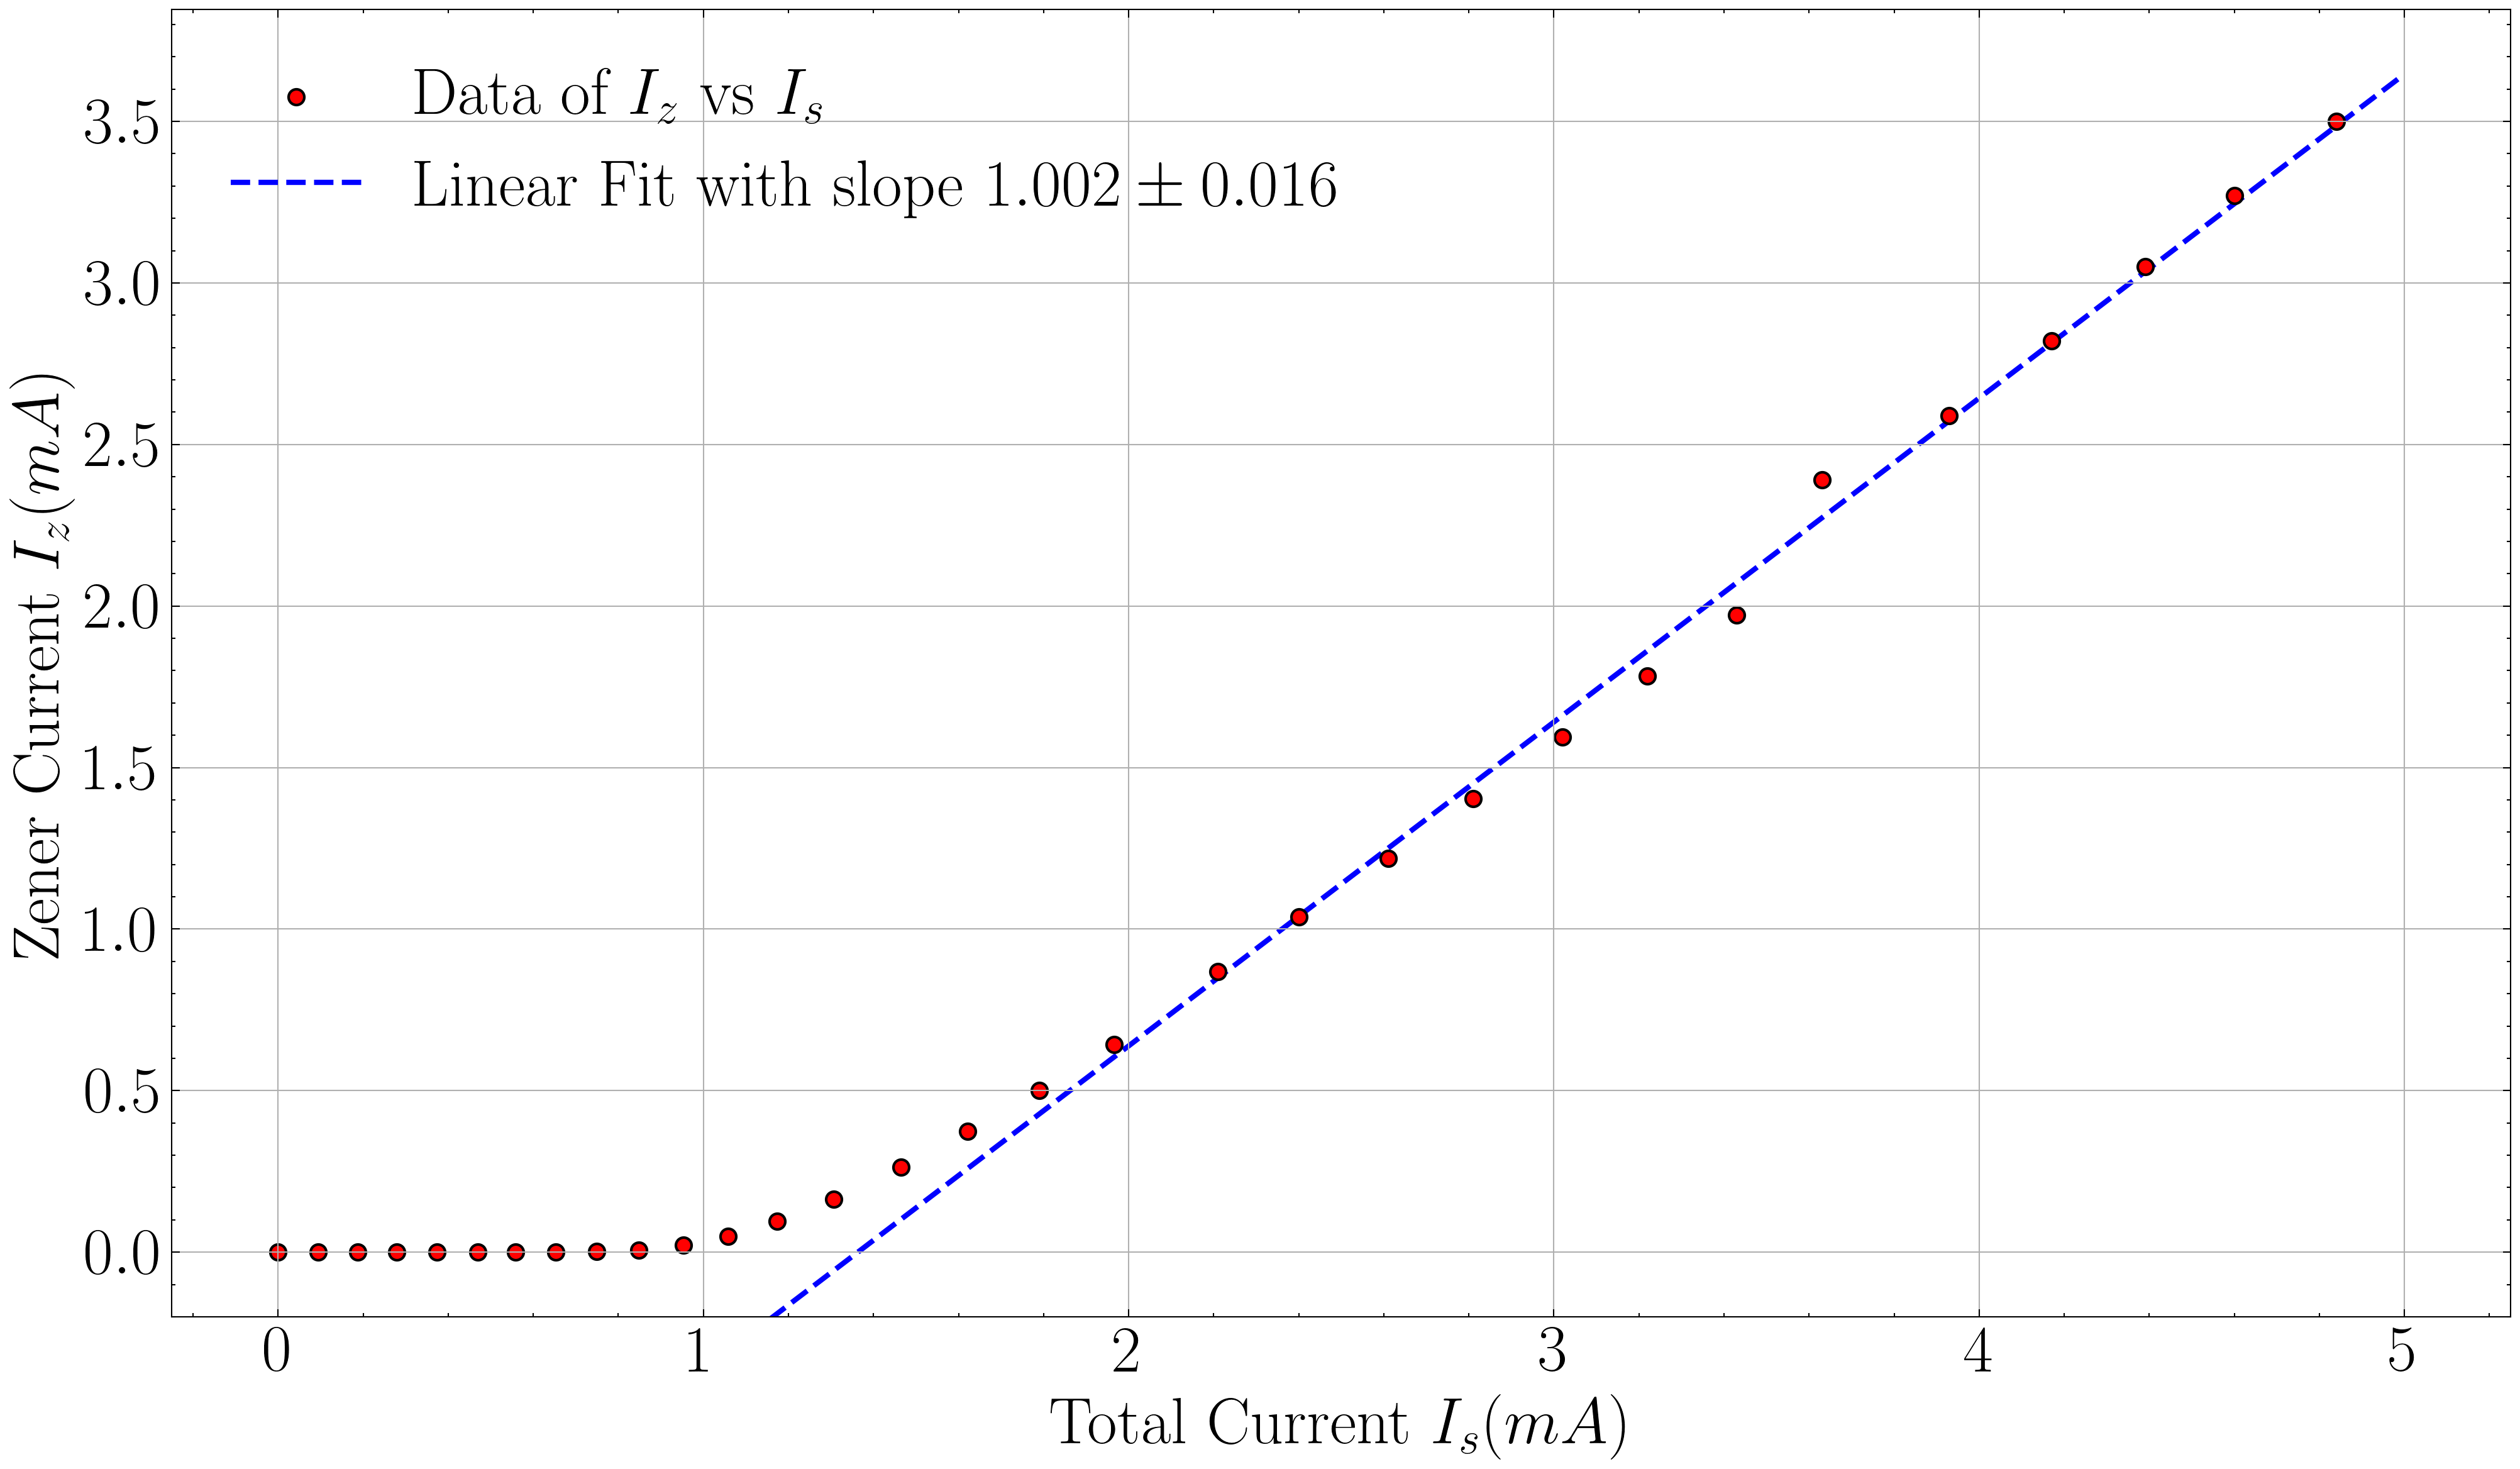

In [65]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
axes.scatter(I_s,I_z,edgecolor='black', color = 'r', label=r"Data of $I_z$ vs $I_s$")
axes.plot(xval, yval,ls = '--',lw=2, c='b', label=r"Linear Fit with slope $1.002 \pm 0.016$", zorder=0)
axes.set_ylim(bottom=-0.2)
axes.set_xlabel(r"Total Current $I_s(mA)$")
axes.set_ylabel(r"Zener Current $I_z(mA)$")
# axes.set_title(r"$I_z$ vs $I_s$ graph"+'\n')
axes.legend()
axes.grid()
fig.savefig("zlinereg_iz_is.png",dpi=300)


In [66]:
Vi = np.asarray(df['Vi (Volts)'], dtype = 'float64')
Vo = np.asarray(df['V0 (Volts)'], dtype = 'float64')
V_min = Vi[np.where(Vo == 4.34)]

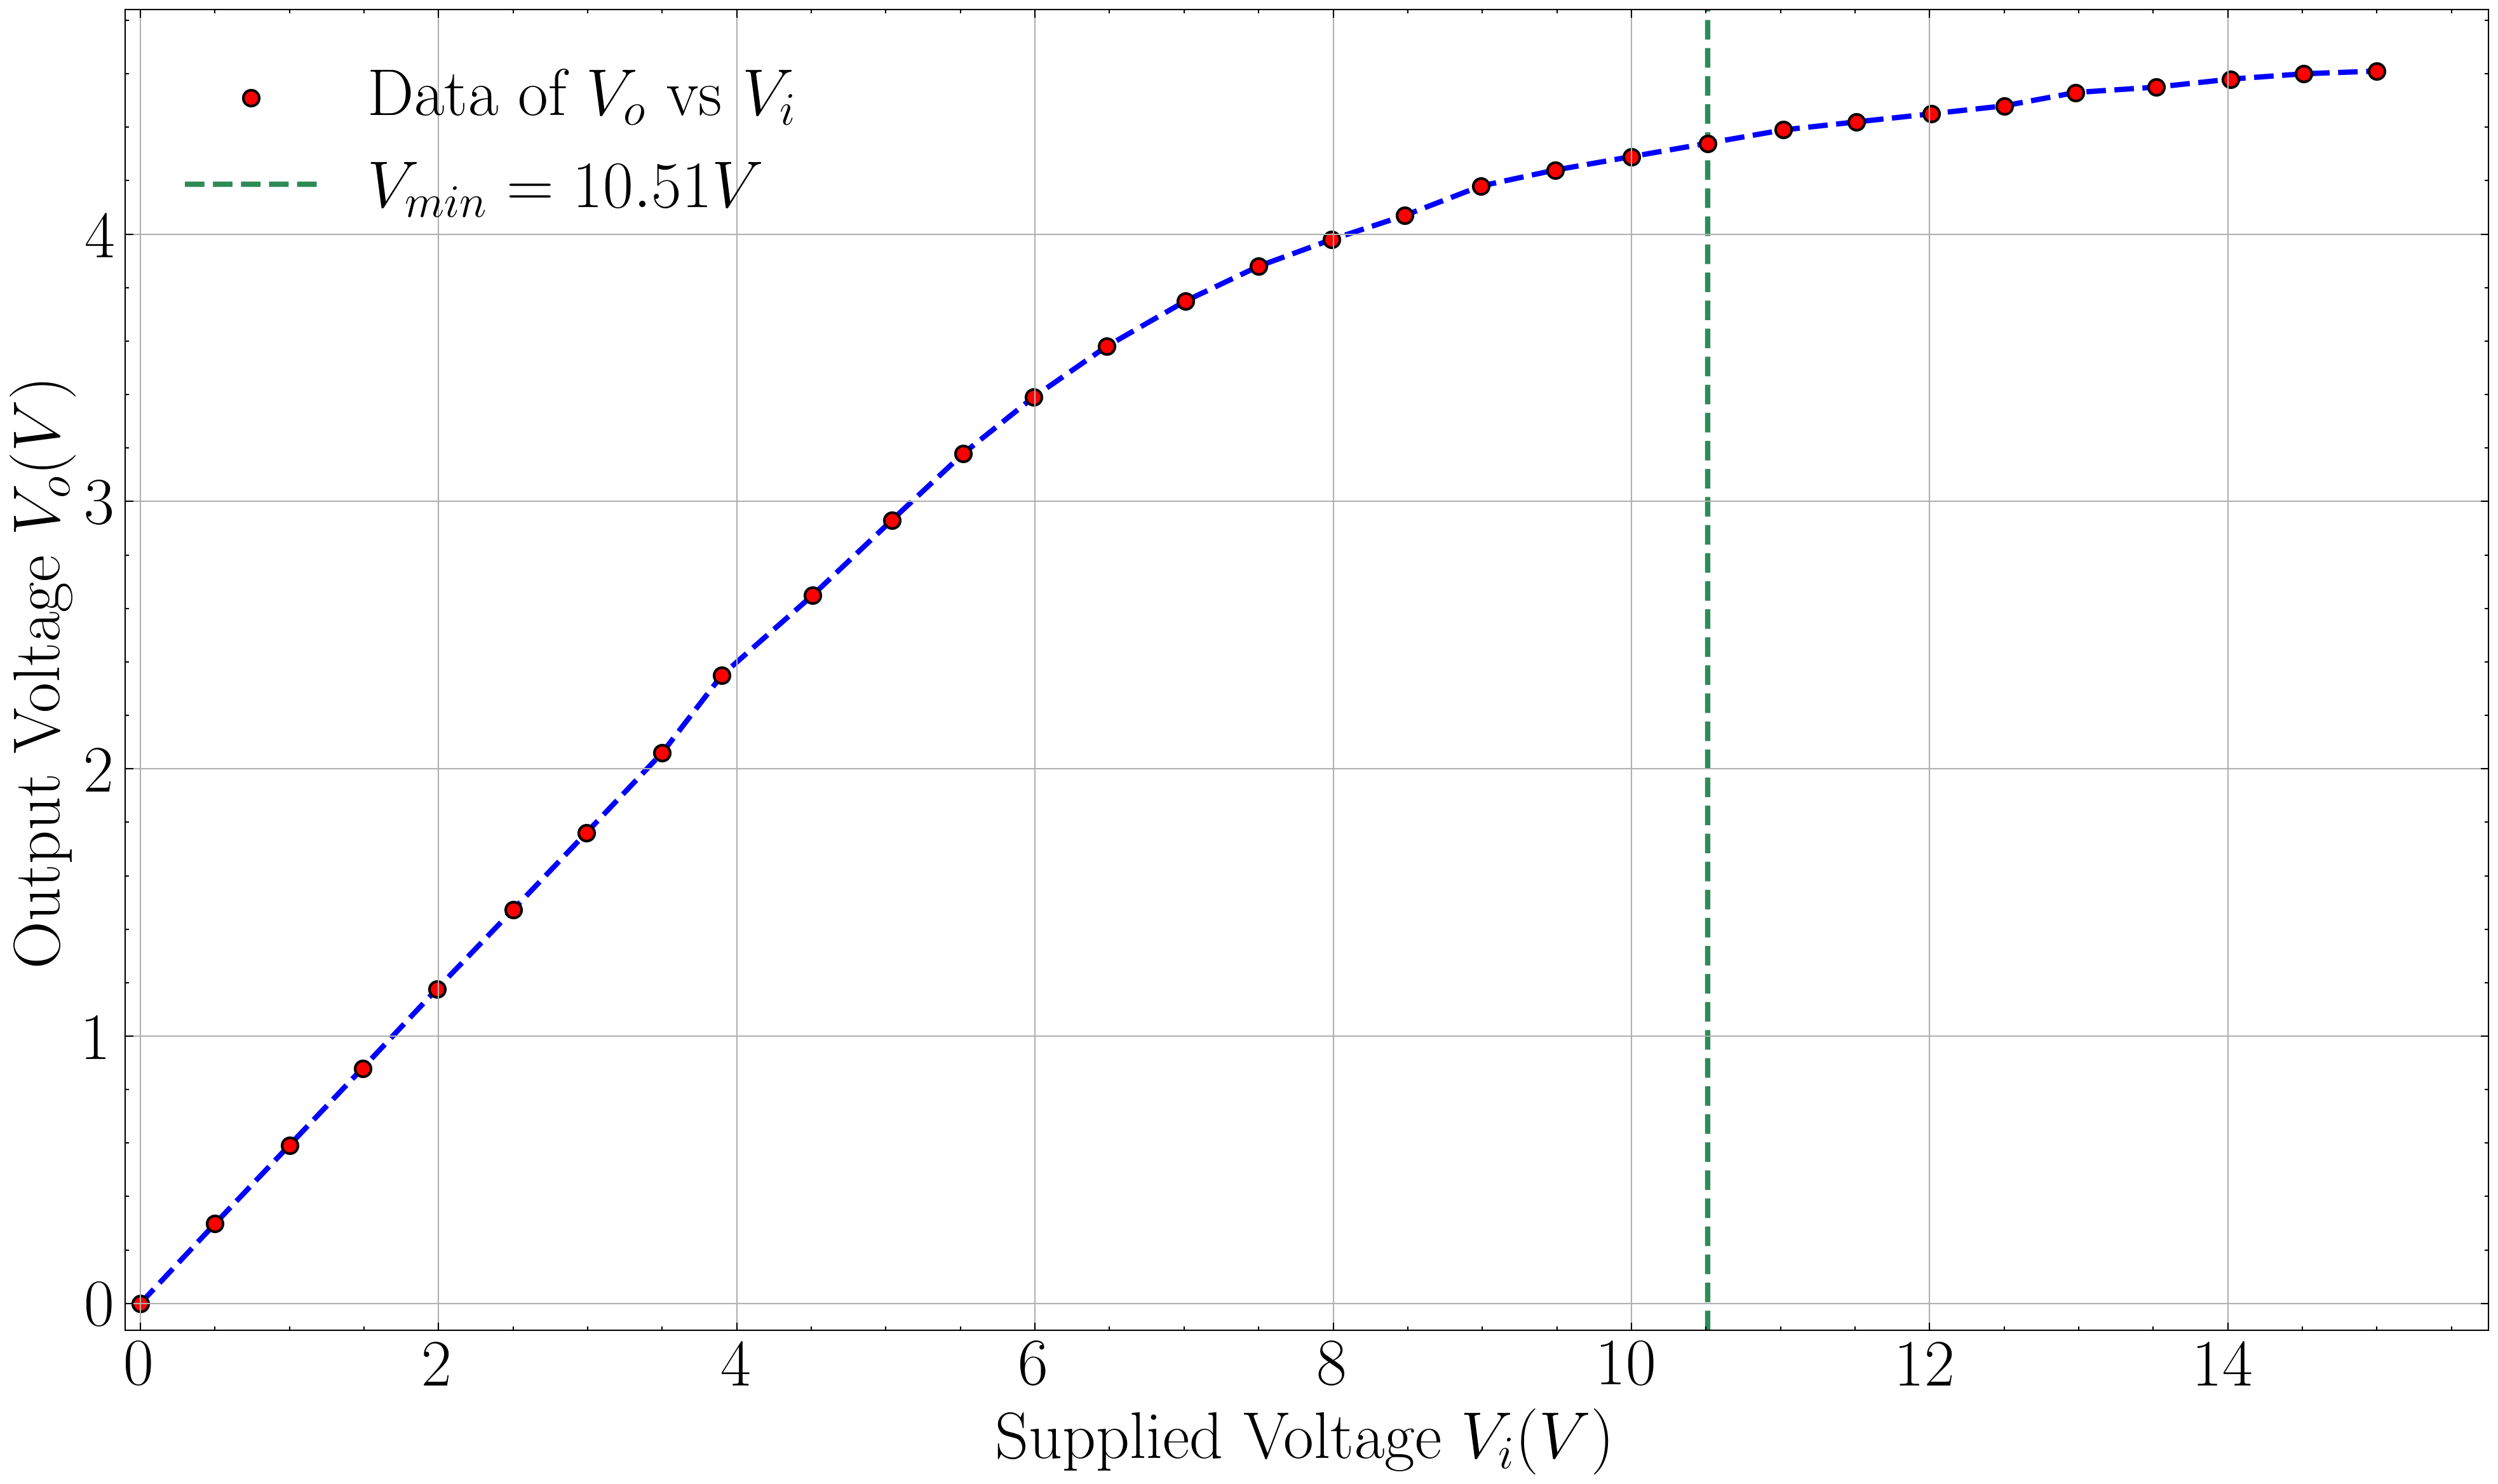

In [67]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
axes.scatter(Vi,Vo,edgecolor='black', color = 'r', label=r"Data of $V_o$ vs $V_i$")
axes.plot(Vi,Vo, ls = '--', lw = 2,color = 'b', zorder=0)
axes.set_xlabel(r"Supplied Voltage $V_i(V)$")
axes.set_ylabel(r"Output Voltage $V_o(V)$")
axes.axvline(V_min, lw=2, ls = '--', zorder=0, color='seagreen', label=r"$V_{min} = 10.51V$ ")
axes.legend()
axes.set_ylim(bottom=-0.1)
axes.set_xlim(left=-0.1)

axes.grid()
fig.savefig("zlinereg_vo_vi.png",dpi=300)


# Zener Load regulation in the breakdown region

In [68]:
I_l2 = np.asarray(df2['i_L(mA)'], dtype = 'float64')
I_z2 = np.asarray(df2['i_Z(mA)'], dtype = 'float64')

In [69]:
param2, pcov2 = curve_fit(linfit, I_l2, I_z2)
xval2 = np.linspace(1.40,2.2,500)
yval2 = linfit(xval2, *param2)
perr2 = np.sqrt(np.diag(pcov2))
param2, perr2

(array([-0.96222828,  4.93896445]), array([0.0196439 , 0.03589795]))

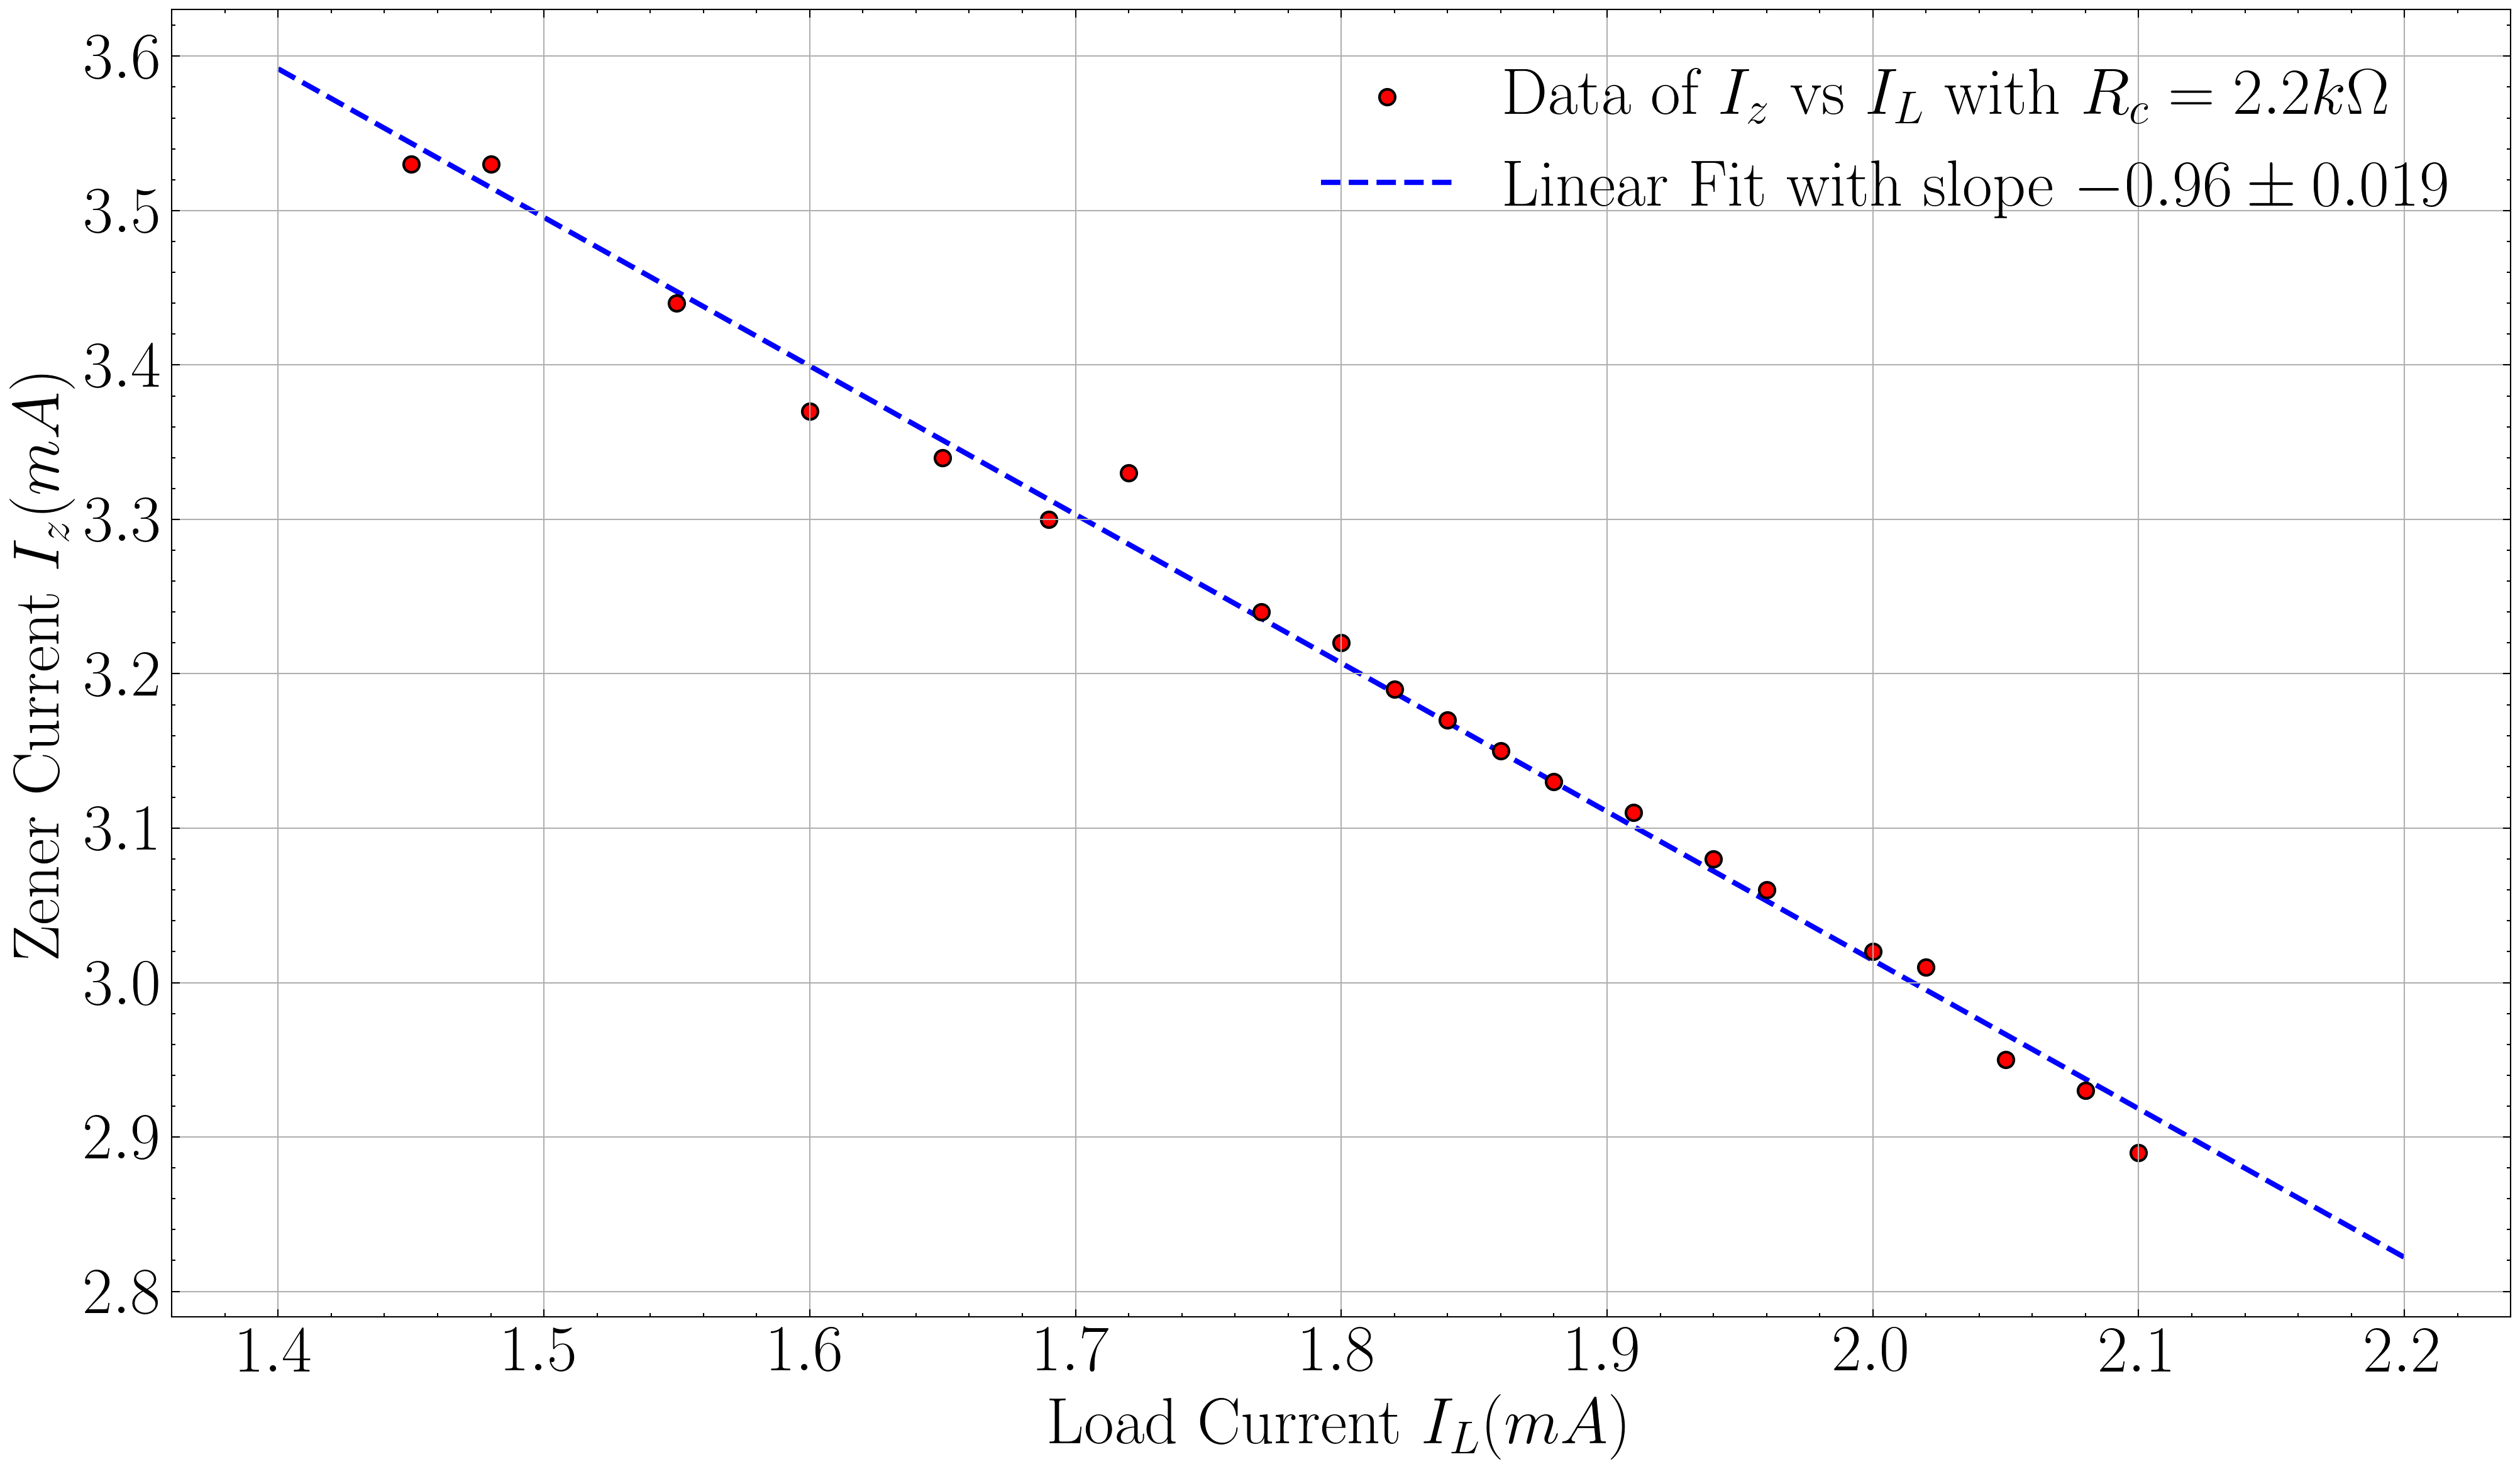

In [70]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
axes.scatter(I_l2,I_z2,edgecolor='black', color = 'r', label=r"Data of $I_z$ vs $I_L$ with $R_c = 2.2 k\Omega$")
axes.plot(xval2, yval2,ls = '--',lw=2, c='b', label=r"Linear Fit with slope $-0.96 \pm 0.019$", zorder=0)
axes.set_xlabel(r"Load Current $I_L(mA)$")
axes.set_ylabel(r"Zener Current $I_z(mA)$")
# axes.set_title(r"$I_z$ vs $I_s$ graph"+'\n')
axes.legend()
axes.grid()
fig.savefig("zloadreg_iz_il_rc.png",dpi=300)


In [71]:
Vo2 = np.asarray(df2['V_o(V)'], dtype = 'float64')
Rl2= np.asarray(df2['R_L(kO)'], dtype = 'float64')
avgvo2 = np.average(Vo2)
stdvo2 = np.std(Vo2)
avgvo2plt = avgvo2*np.ones(len(Rl2))
avgvo2, stdvo2

(np.float64(4.589047619047618), np.float64(0.016302135970117818))

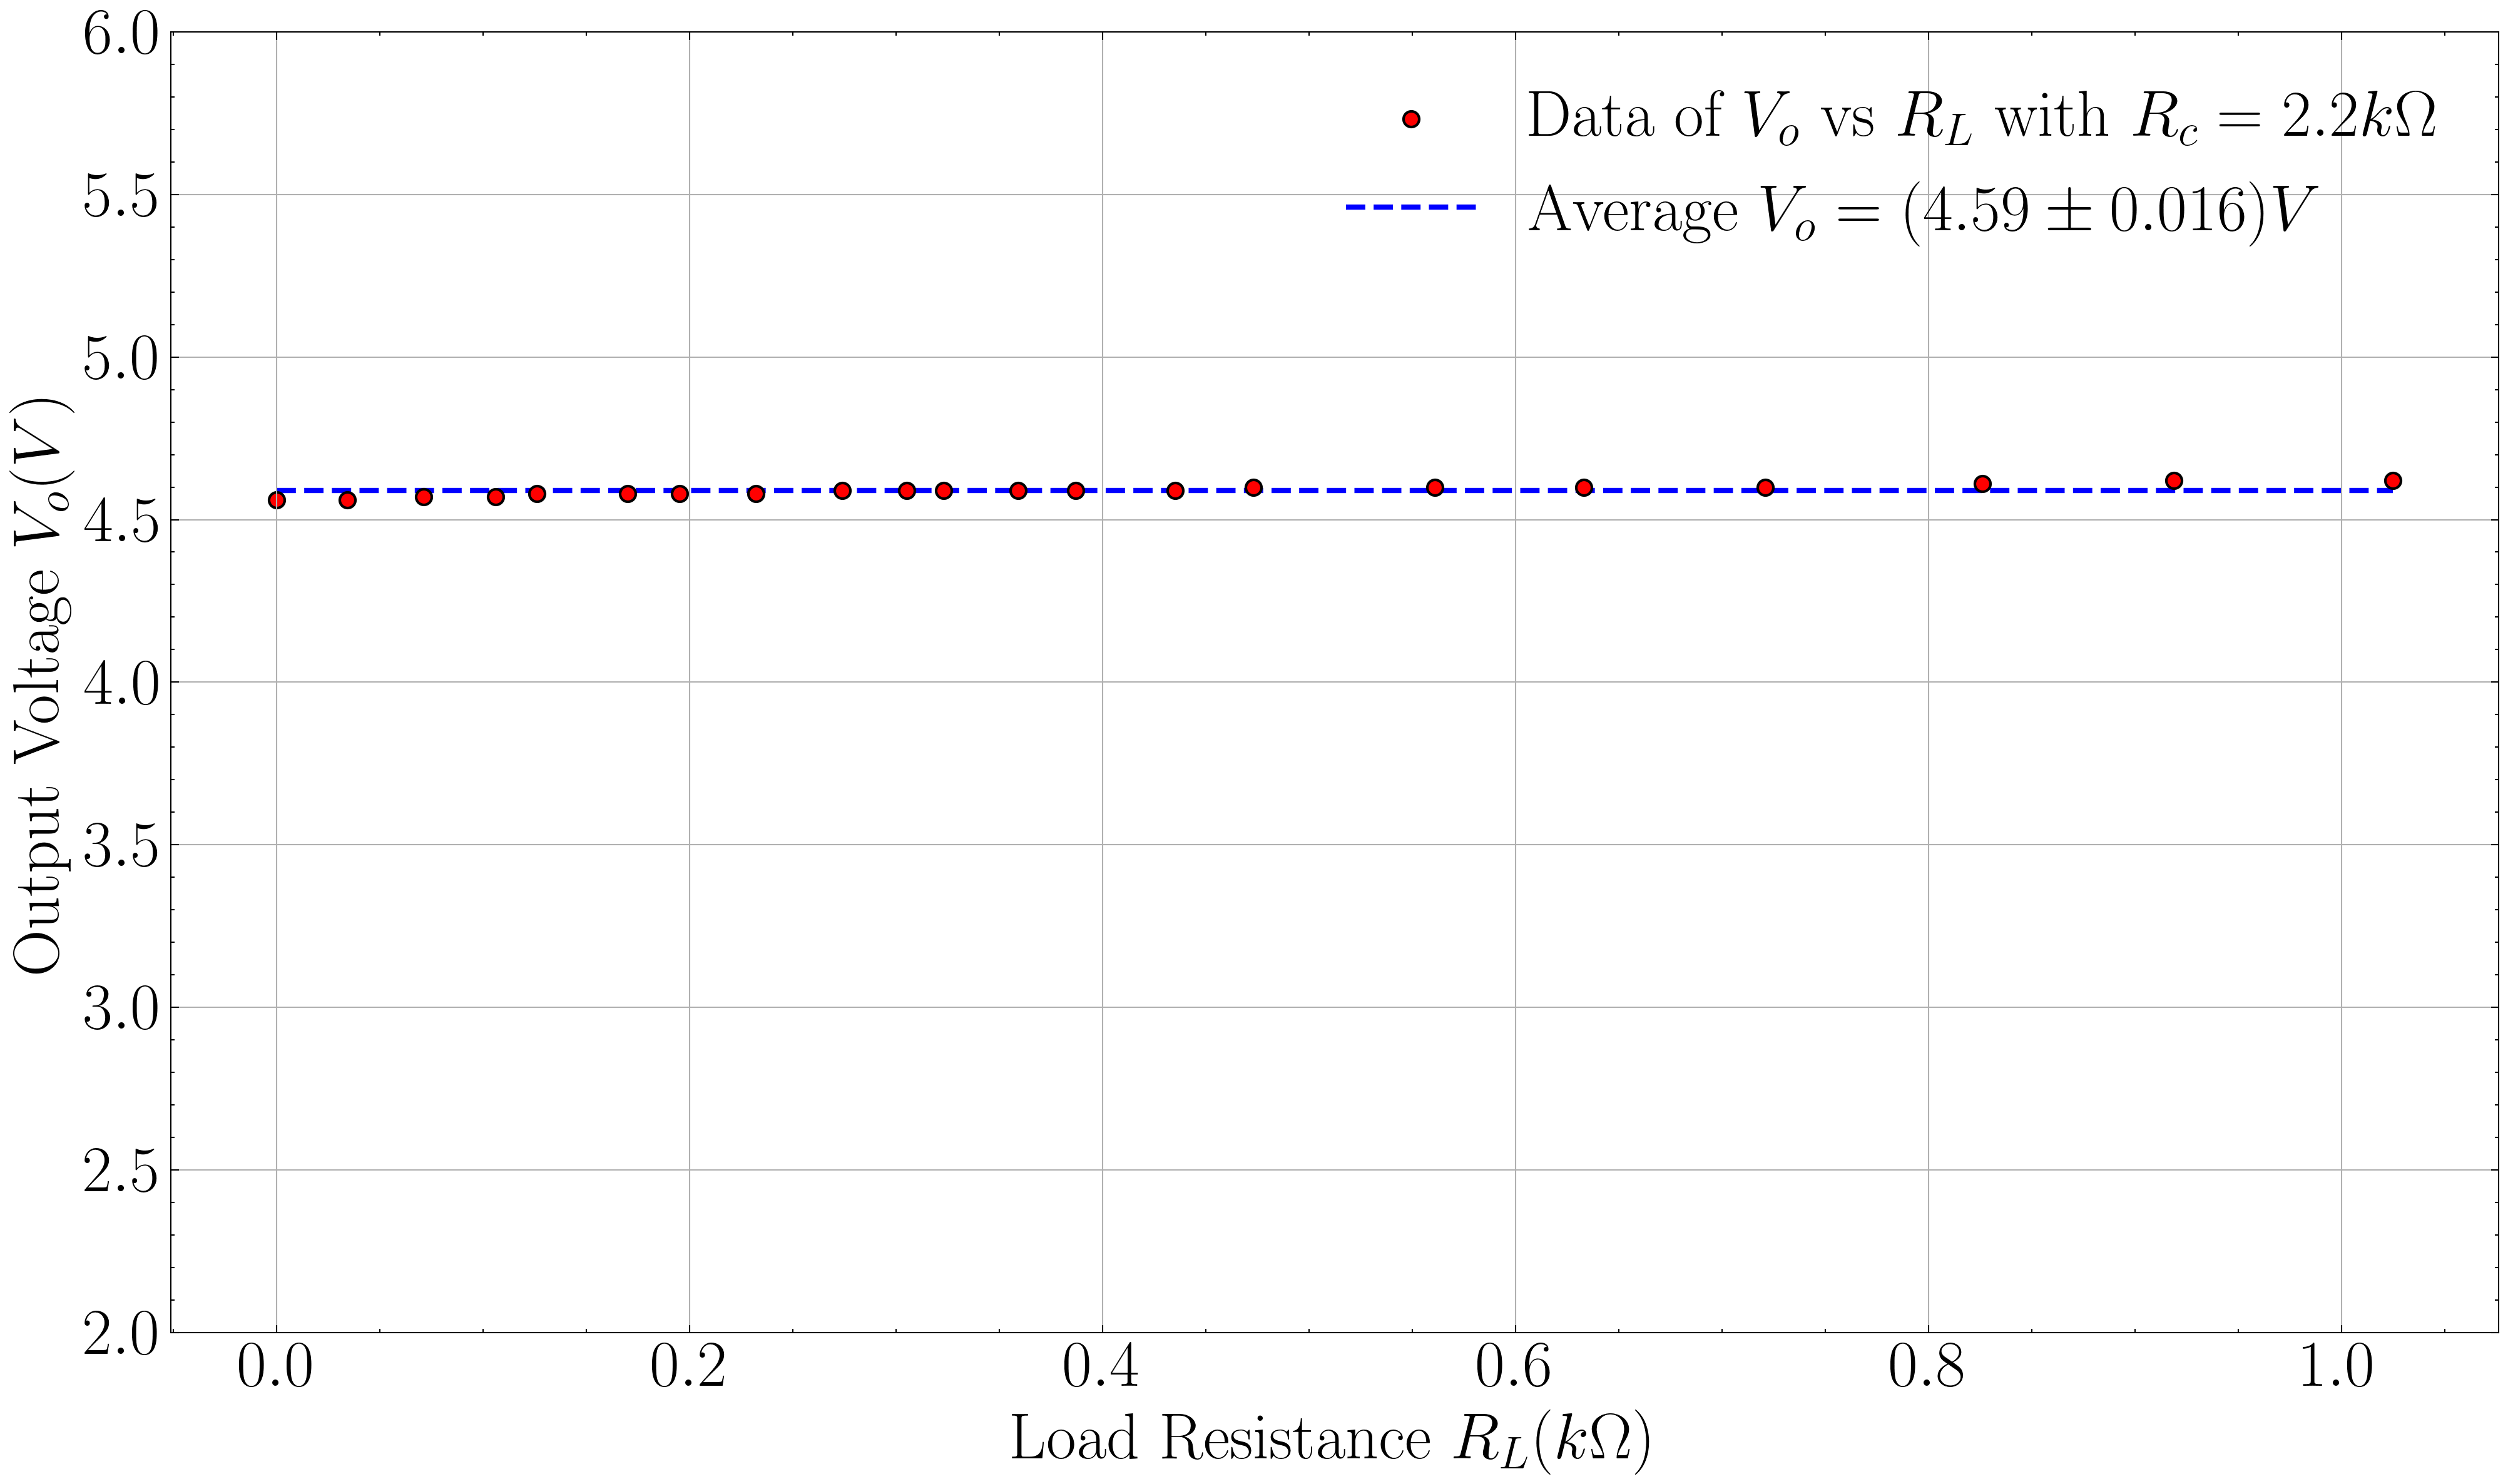

In [72]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
# change Labels
axes.scatter(Rl2,Vo2,edgecolor='black', color = 'r', label=r"Data of $V_o$ vs $R_L$ with $R_c = 2.2 k\Omega$")
axes.plot(Rl2,avgvo2plt,ls = '--', lw = 2,color = 'b', zorder=0, label = r"Average $V_o = (4.59 \pm 0.016)V$")
axes.set_ylim([2,6])
axes.set_xlabel(r"Load Resistance $R_L(k\Omega)$")
axes.set_ylabel(r"Output Voltage $V_o(V)$")
# axes.set_title(r"$I_z$ vs $I_s$ graph"+'\n')
axes.legend()
axes.grid()
fig.savefig("zloadreg_vo_rl_rc.png",dpi=300)


# Zener Load regulation approaching breakdown

In [73]:
I_l3 = np.asarray(df3['i_L(mA)'], dtype = 'float64')
I_z3 = np.asarray(df3['i_Z(mA)'], dtype = 'float64')

In [74]:
param3, pcov3 = curve_fit(linfit, I_l3[8:], I_z3[8:])
xval3 = np.linspace(3.10,4.1,500)
yval3 = linfit(xval3, *param3)
perr3 = np.sqrt(np.diag(pcov3))
param3, perr3

(array([-0.92159091,  3.70453734]), array([0.02141762, 0.08063854]))

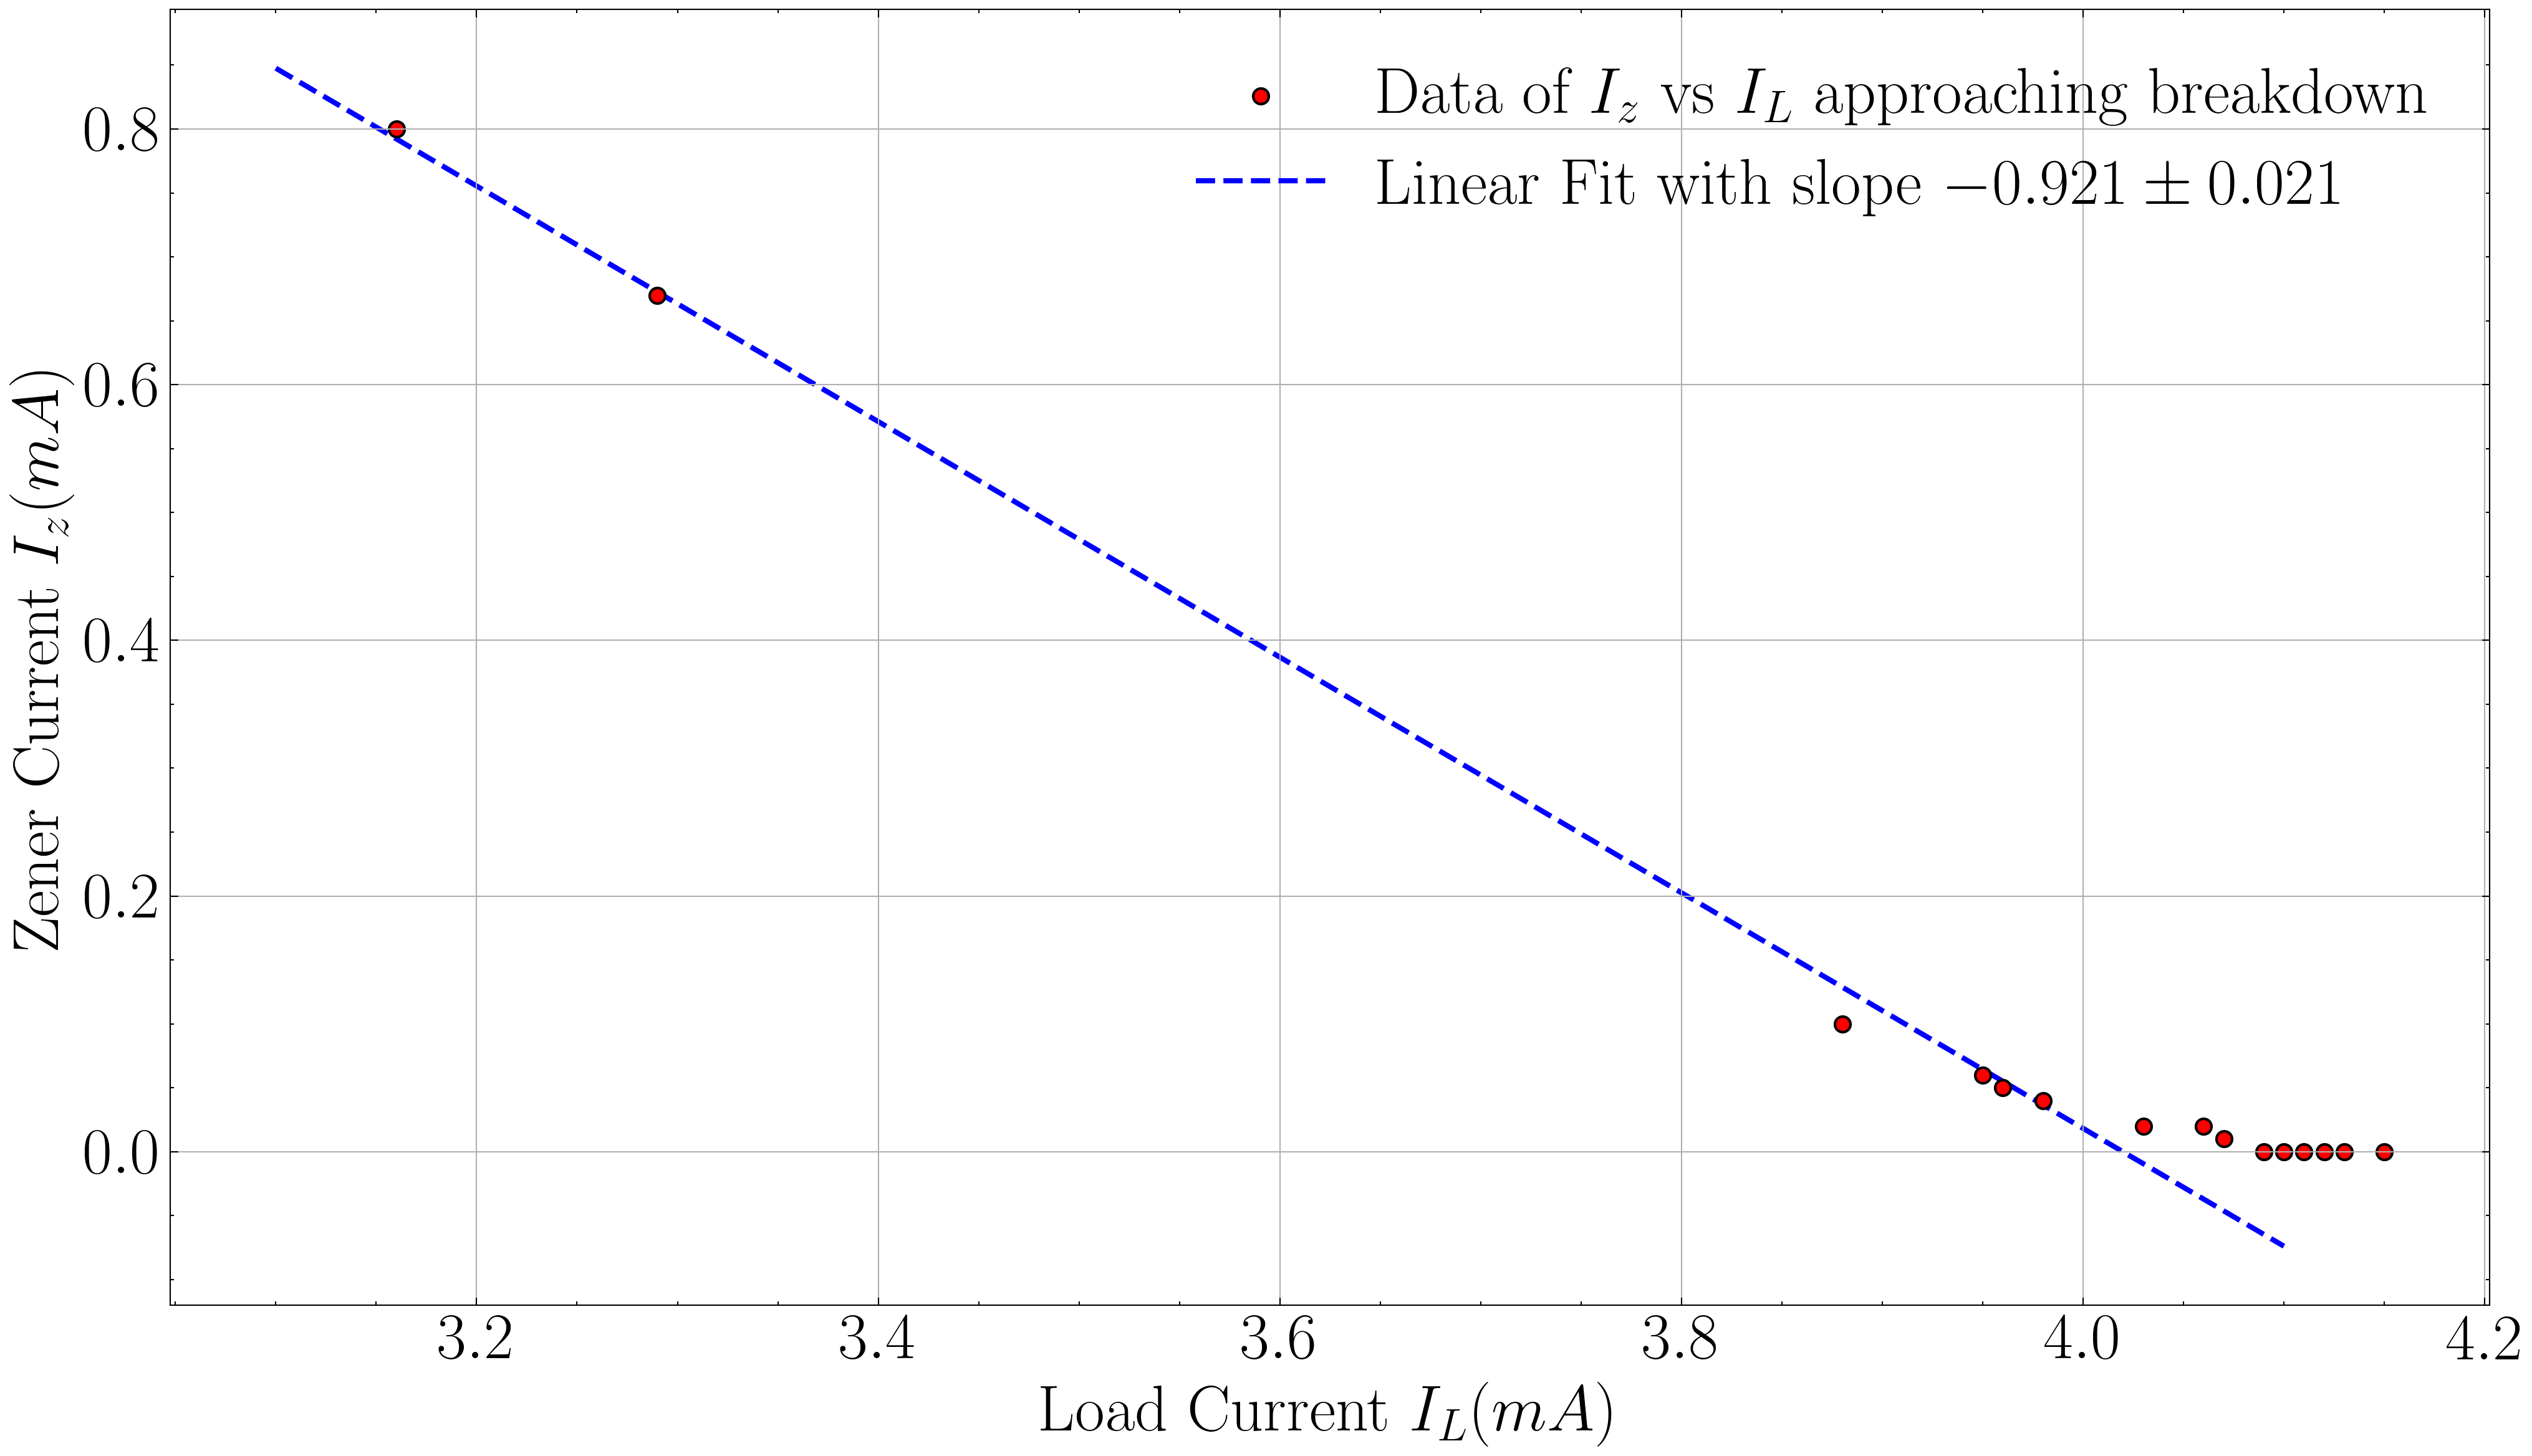

In [75]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
axes.scatter(I_l3,I_z3,edgecolor='black', color = 'r', label=r"Data of $I_z$ vs $I_L$ approaching breakdown")
axes.plot(xval3, yval3,ls = '--',lw=2, c='b', label=r"Linear Fit with slope $-0.921 \pm 0.021$", zorder=0)
axes.set_xlabel(r"Load Current $I_L(mA)$")
axes.set_ylabel(r"Zener Current $I_z(mA)$")
# axes.set_title(r"$I_z$ vs $I_s$ graph"+'\n')
axes.legend()
axes.grid()
fig.savefig("zloadreg_iz_il.png",dpi=300)


In [76]:
Vo3 = np.asarray(df3['V_o(V)'], dtype = 'float64')
Rl3 = np.asarray(df3['R_L(kO)'], dtype = 'float64')
Vo3, Rl3

(array([6.03, 6.07, 6.1 , 6.12, 6.14, 6.16, 6.18, 6.22, 6.26, 6.34, 6.35,
        6.36, 6.41, 6.44, 6.46]),
 array([1.45 , 1.473, 1.486, 1.492, 1.497, 1.521, 1.528, 1.584, 1.563,
        1.583, 1.626, 1.616, 1.661, 1.967, 2.04 ]))

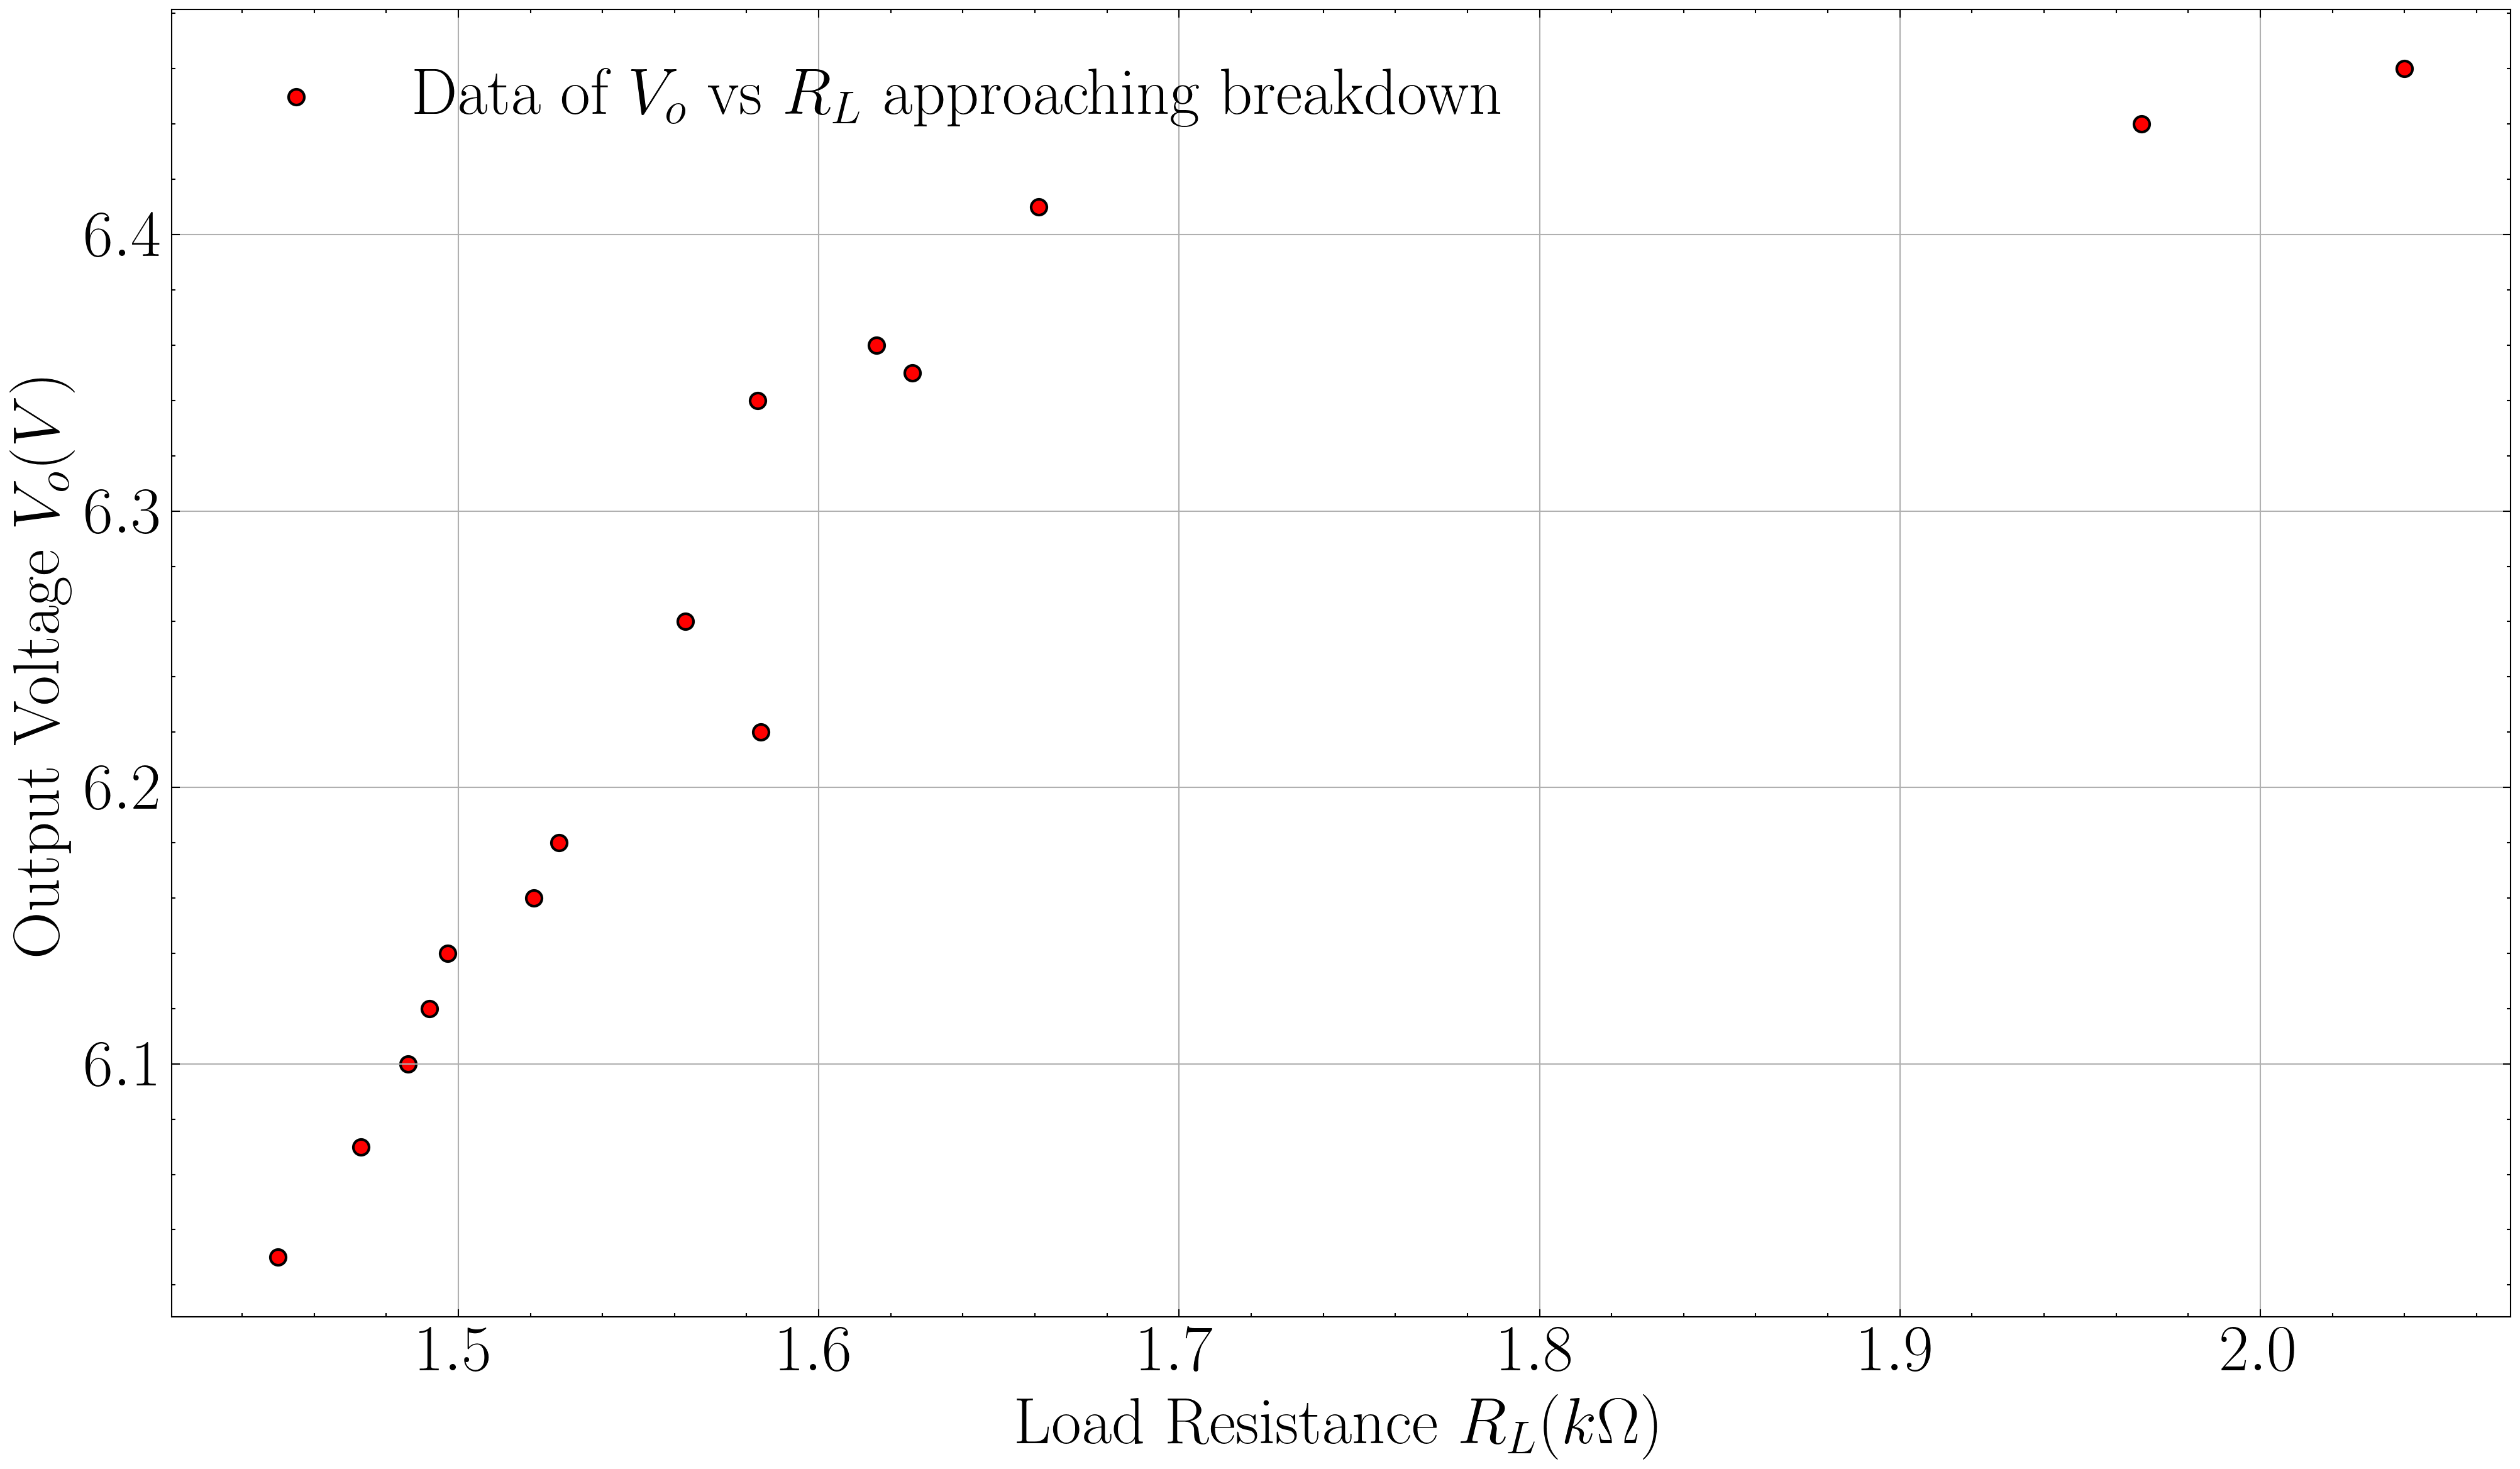

In [77]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
# change Labels
axes.scatter(Rl3,Vo3,edgecolor='black', color = 'r', label=r"Data of $V_o$ vs $R_L$ approaching breakdown")
# axes.plot(Rl3,Vo3, ls = '--', lw = 2,color = 'b', zorder=0)
axes.set_xlabel(r"Load Resistance $R_L (k\Omega)$")
axes.set_ylabel(r"Output Voltage $V_o(V)$")
# axes.set_title(r"$I_z$ vs $I_s$ graph"+'\n')
axes.legend()
axes.grid()
fig.savefig("zloadreg_vo_rl.png",dpi=300)


# IC Line Regulation

In [78]:
V_i_ic = np.asarray(df4['Vi (Volts)'], dtype='float64')
V_o_ic = np.asarray(df4['V0 (V)'], dtype = 'float64')
V_clamp = V_i_ic[np.where(V_o_ic == 5.12)]
V_clamp

array([6.48])

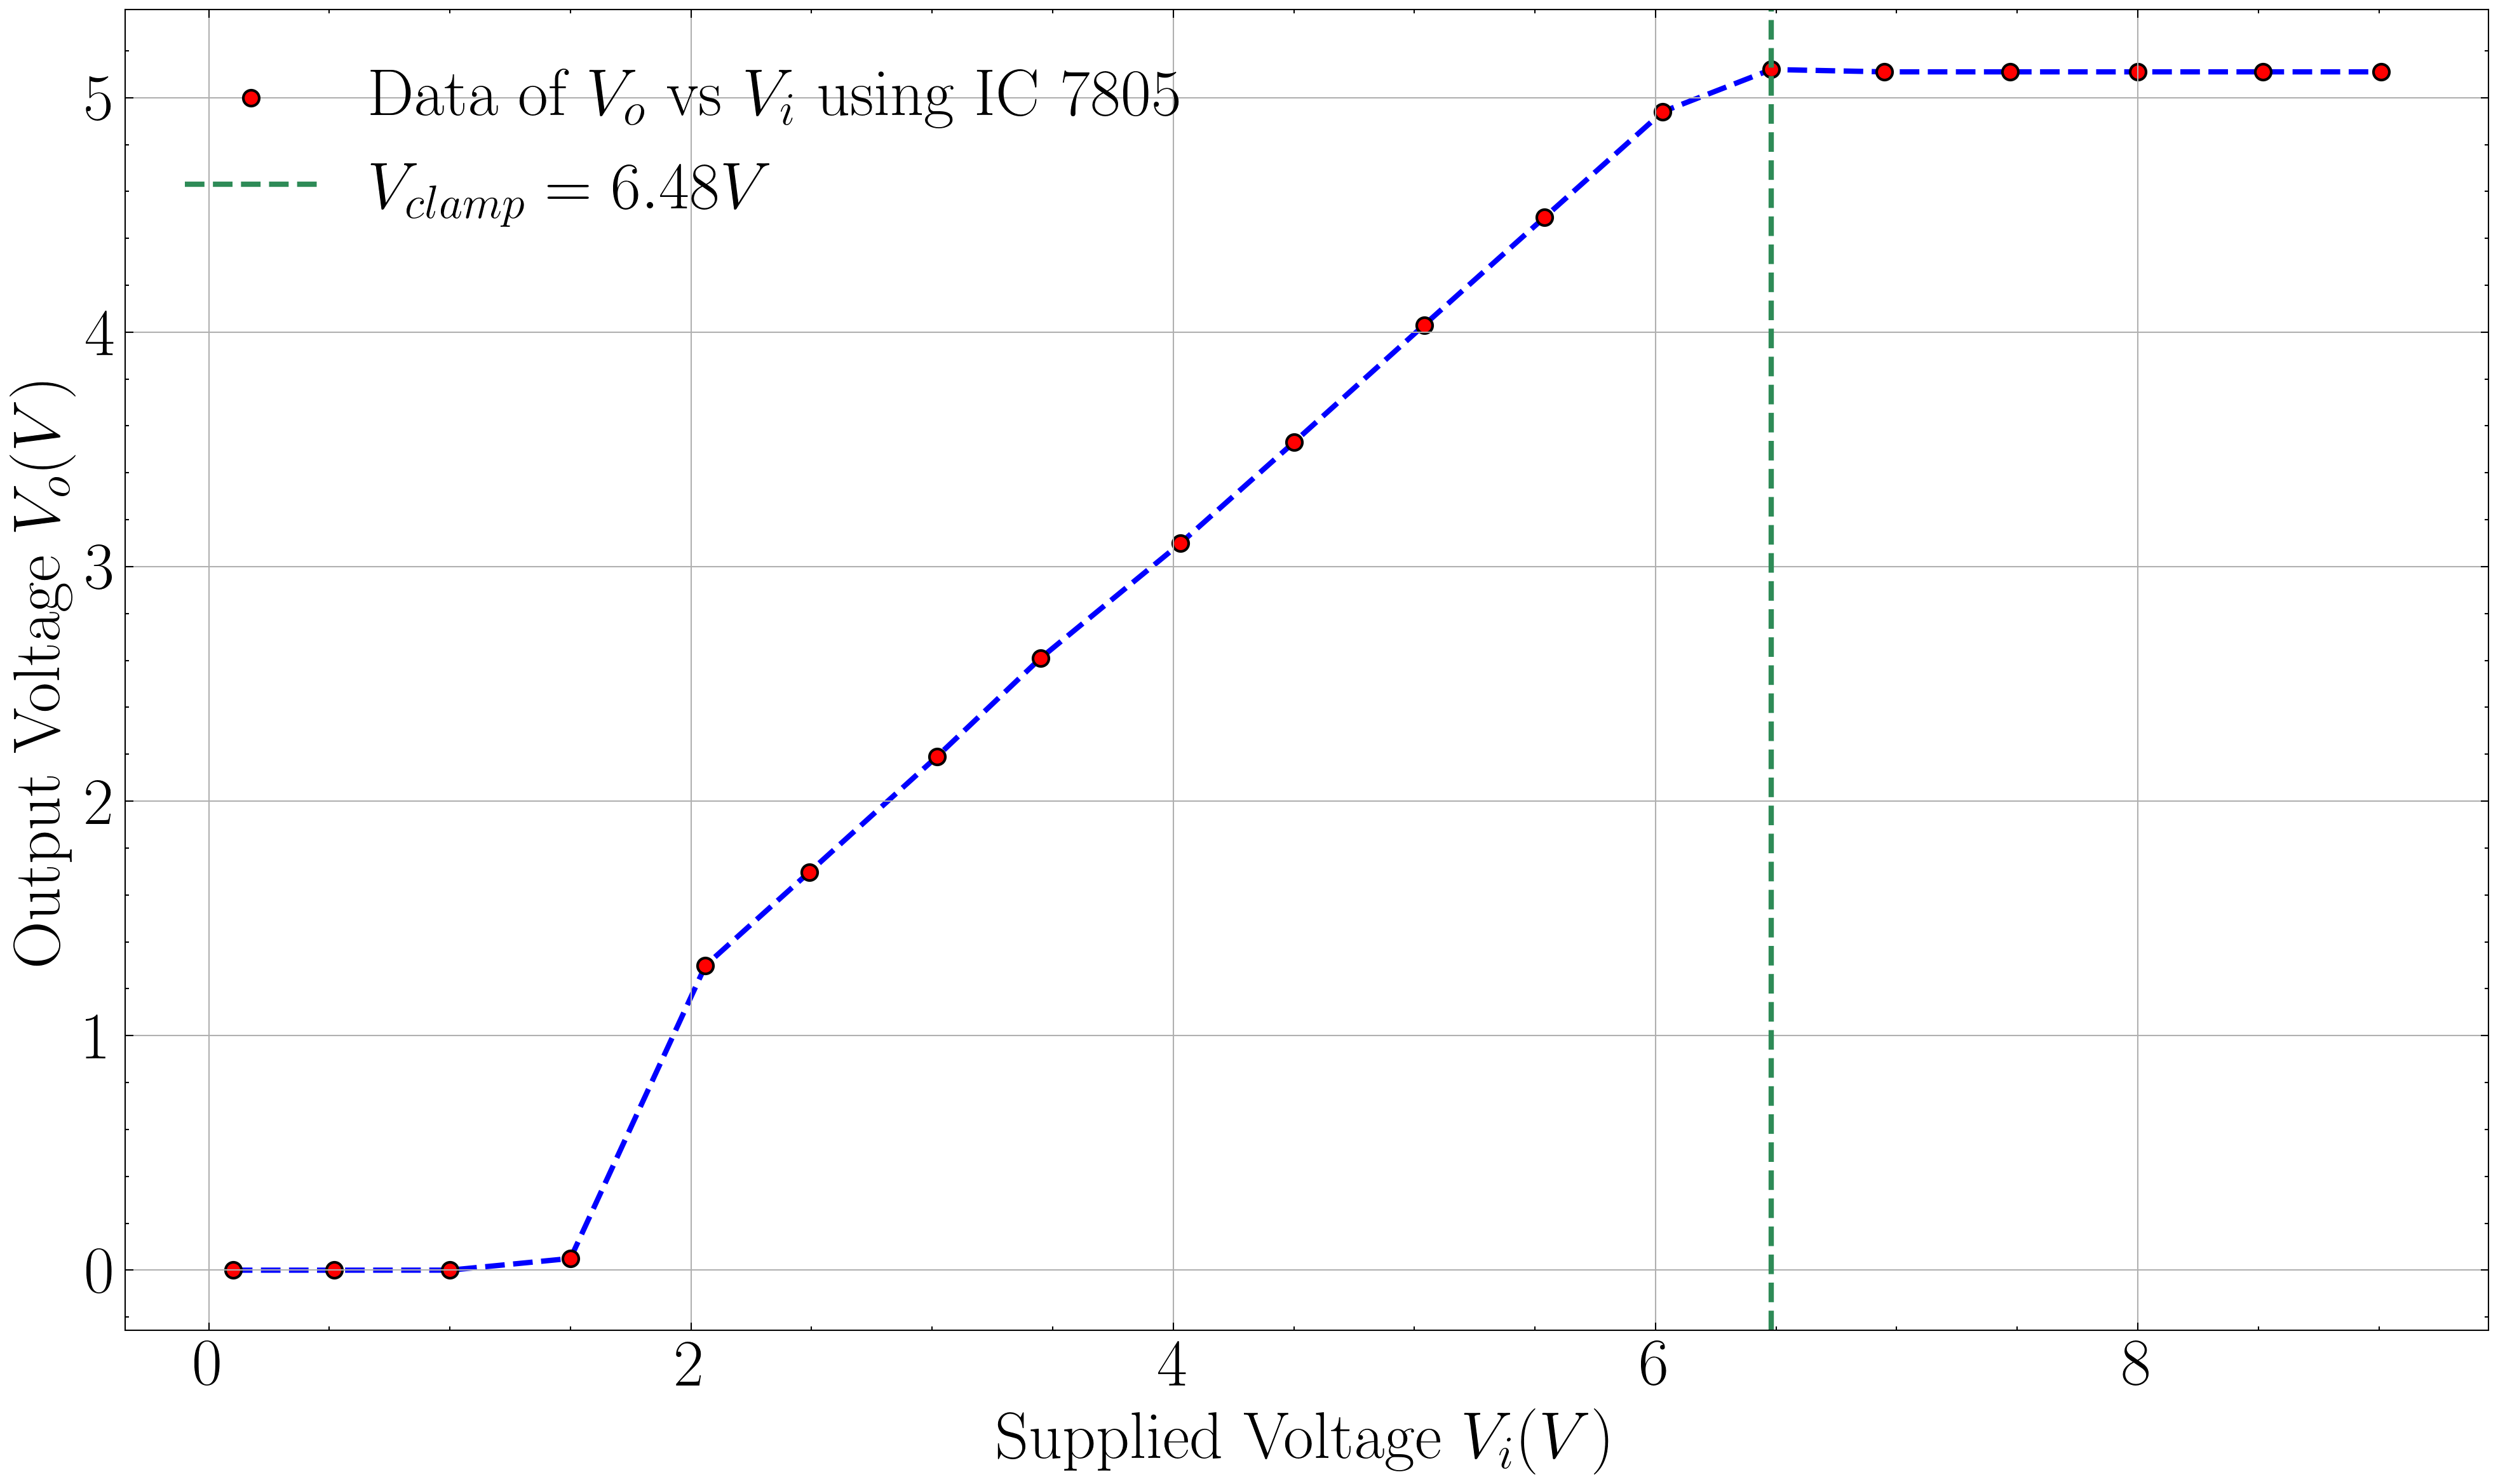

In [79]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
axes.scatter(V_i_ic,V_o_ic,edgecolor='black', color = 'r', label=r"Data of $V_o$ vs $V_i$ using IC 7805")
axes.plot(V_i_ic,V_o_ic, ls = '--', lw = 2,color = 'b', zorder=0)
axes.axvline(V_clamp,ls = '--', lw = 2,color = 'seagreen', label = r"$V_{clamp} = 6.48 V$")
axes.set_xlabel(r"Supplied Voltage $V_i(V)$")
axes.set_ylabel(r"Output Voltage $V_o(V)$")
# axes.set_title(r"$I_z$ vs $I_s$ graph"+'\n')
axes.legend()
axes.grid()
fig.savefig("iclinereg_vo_vi.png",dpi=300)


# IC load regulation

In [80]:
V_o_ic2 = np.asarray(df5['V0 (V)'], dtype = 'float64')
R_l_ic2 = np.asarray(df5['RL (k ohms)'], dtype = 'float64')
voic2 = np.average(V_o_ic2)
voic2std = np.std(V_o_ic2, ddof=1)
voic2plt = voic2*np.ones(len(R_l_ic2))
voic2, voic2std

(np.float64(5.0227272727272725), np.float64(0.01272077756342689))

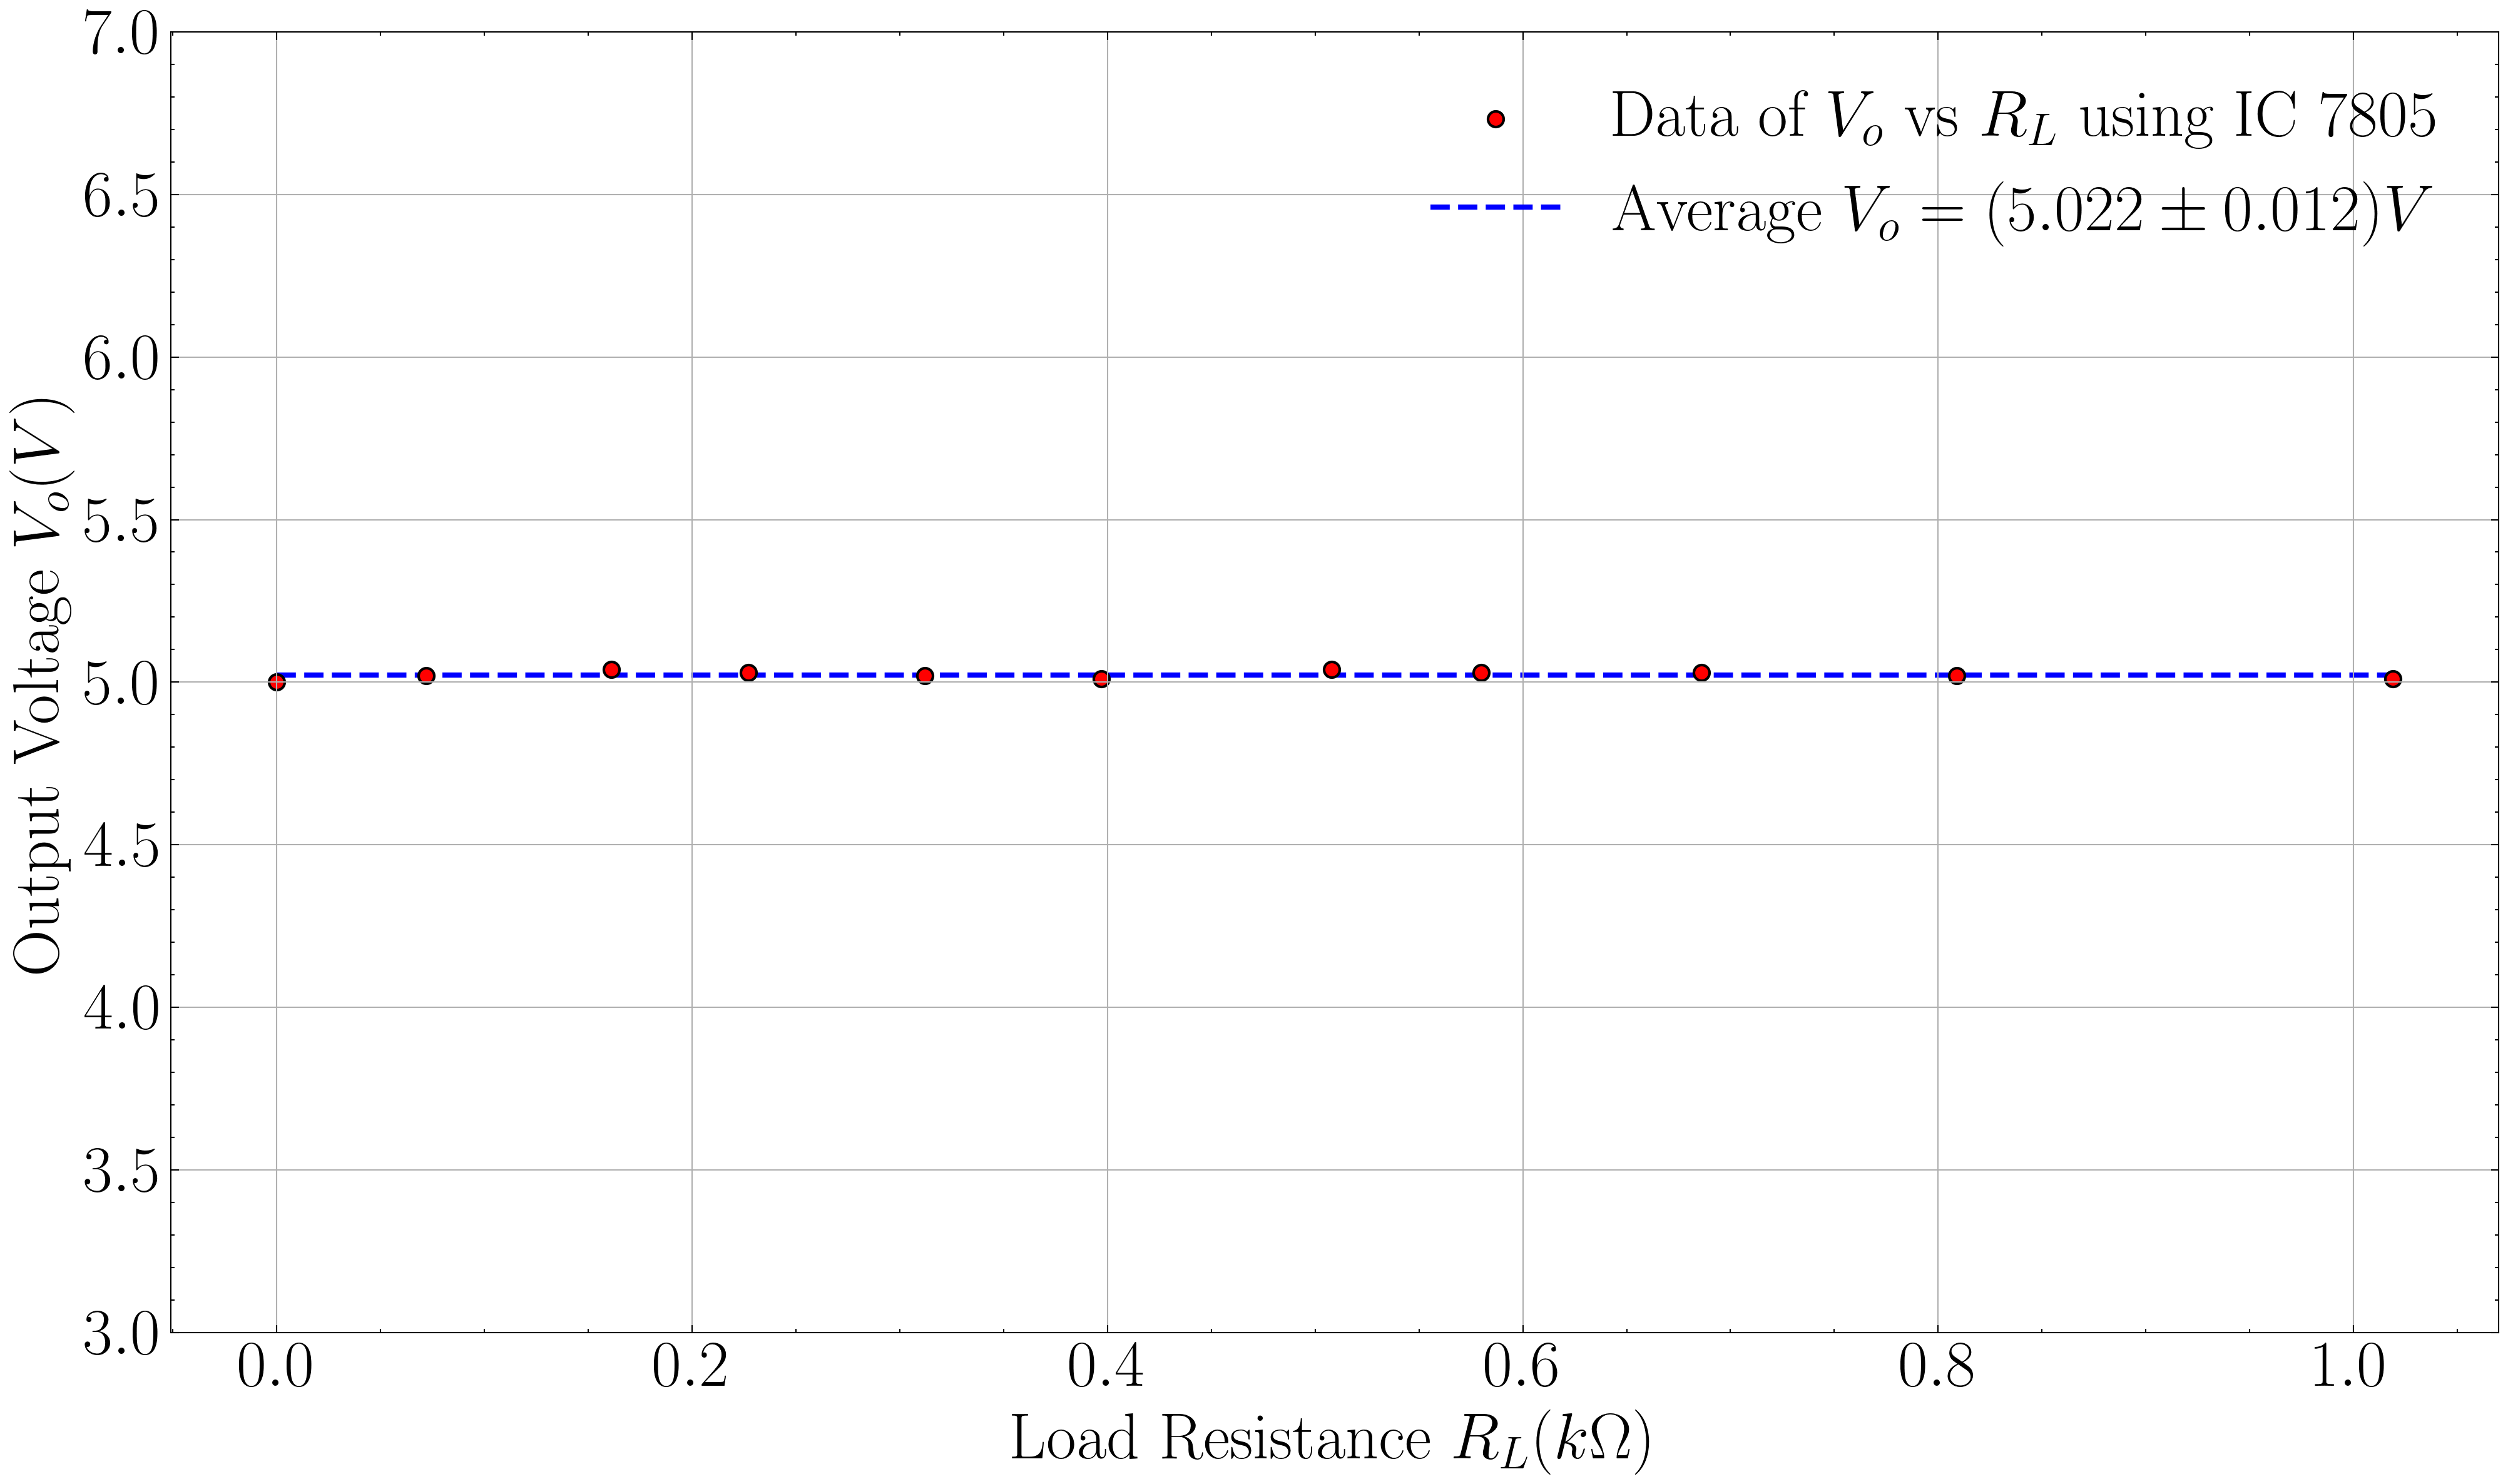

In [81]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
axes.scatter(R_l_ic2,V_o_ic2,edgecolor='black', color = 'r', label=r"Data of $V_o$ vs $R_L$ using IC 7805")
# axes.plot(Vi,Vo, ls = '--', lw = 2,color = 'b', zorder=0)
axes.set_ylim([3,7])
axes.plot(R_l_ic2,voic2plt,ls = '--', lw = 2,color = 'b', zorder=0, label = r"Average $V_o = (5.022 \pm 0.012) V$")

axes.set_xlabel(r"Load Resistance $R_L(k \Omega)$")
axes.set_ylabel(r"Output Voltage $V_o(V)$")
# axes.set_title(r"$I_z$ vs $I_s$ graph"+'\n')
axes.legend()
axes.grid()
fig.savefig("icloadreg_vo_rl.png",dpi=300)


In [89]:
dff = pd.read_csv("Untitled.txt", delimiter="\t")

In [90]:
dff

,0,-5.424E-6
0,0.001,-0.000005
1,0.002,-0.000005
2,0.003,-0.000005
3,0.004,-0.000005
4,0.005,-0.000005
...,...,...
3194,0.005,-0.000009
3195,0.004,-0.000009
3196,0.003,-0.000009
3197,0.002,-0.000009


In [91]:
XX = np.asarray(dff['0'], dtype='float64')
YY = np.asarray(dff['-5.424E-6'], dtype='float64')

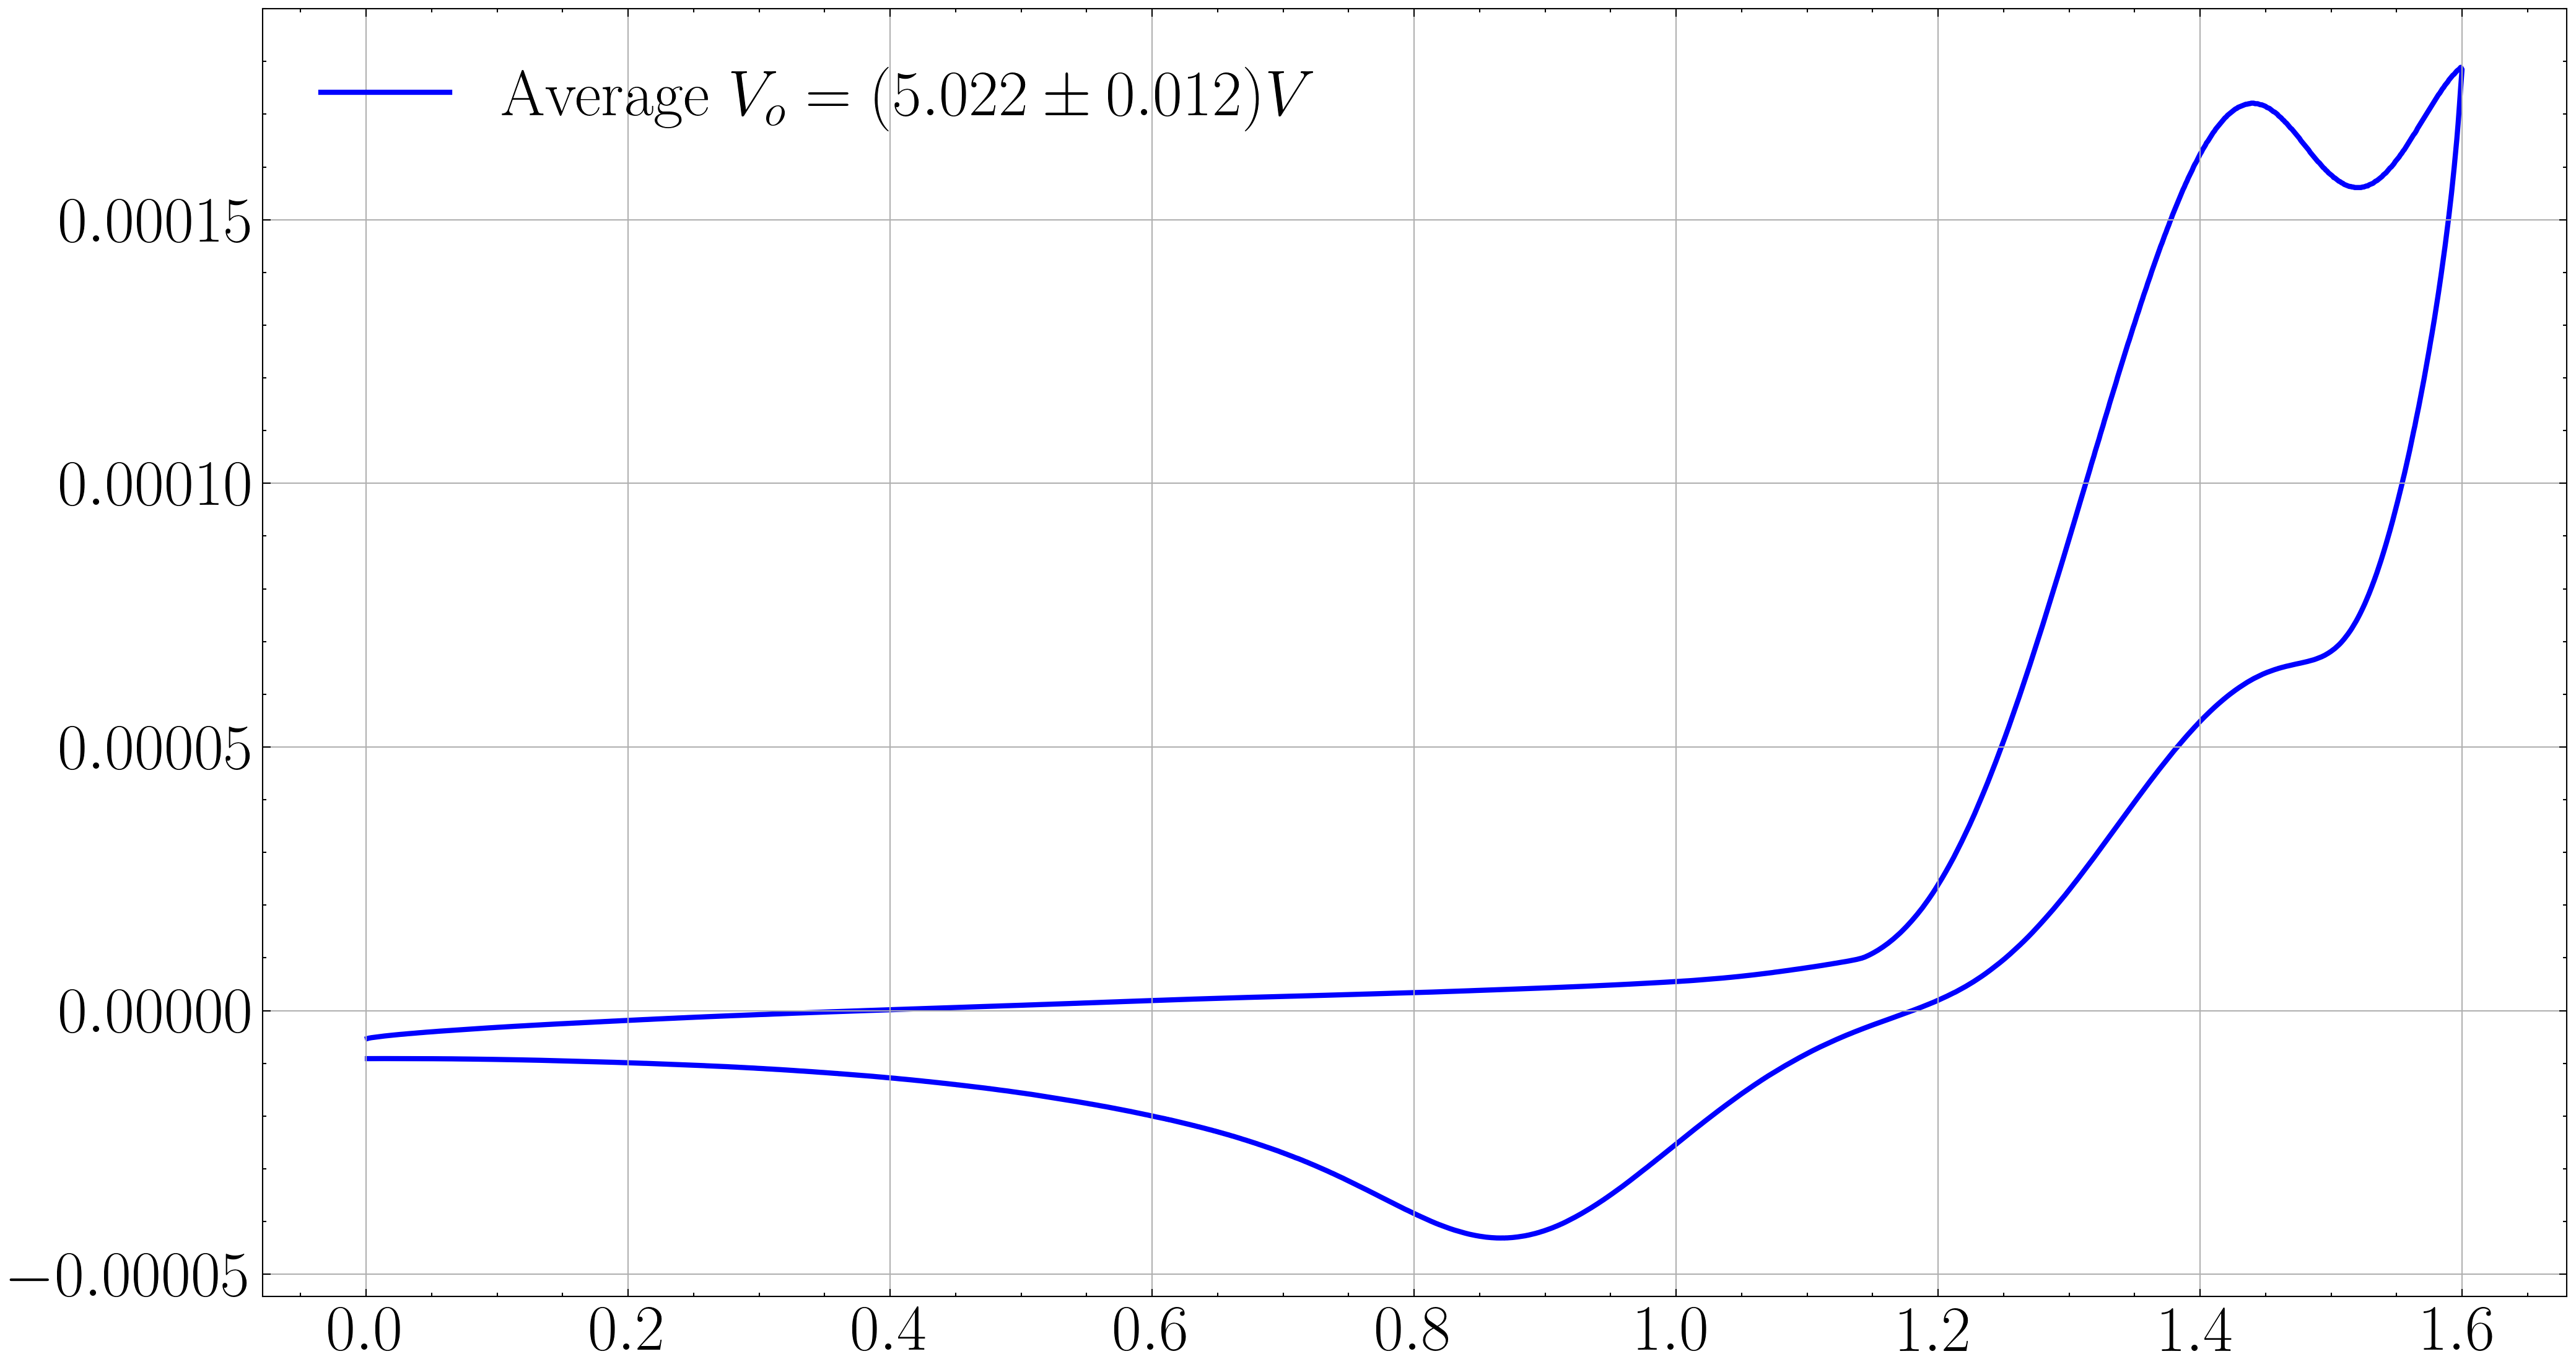

In [94]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
# axes.plot(R_l_ic2,V_o_ic2,edgecolor='black', color = 'r', label=r"Data of $V_o$ vs $R_L$ using IC 7805")
# axes.plot(Vi,Vo, ls = '--', lw = 2,color = 'b', zorder=0)
# axes.set_ylim([3,7])
axes.plot(XX,YY,ls = '-', lw = 2,color = 'b', zorder=0, label = r"Average $V_o = (5.022 \pm 0.012) V$")

# axes.set_xlabel(r"Load Resistance $R_L(k \Omega)$")
# axes.set_ylabel(r"Output Voltage $V_o(V)$")
# axes.set_title(r"$I_z$ vs $I_s$ graph"+'\n')
axes.legend()
axes.grid()
